# Before we start...
Let's import our essential libraries first


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
pio.templates.default = "simple_white"
antq_blue = "#336699"
antq_purple = "#ac39ac"
antq_red = "#e63900"
antq_orange = "#ff8c1a"
faded_grey = "#e6e6e6"
light_grey = "#d9d9d9"
heading_font = "Brush Script MT, Brush Script Std, cursive"
normal_font = "times new roman"
palette = px.colors.qualitative.Set2
palette_r = px.colors.qualitative.Set2_r
set1 = px.colors.qualitative.Set1
set3 = px.colors.qualitative.Set3

# Problem 1 : Data Preparation
Dataset from Kaggle : The "Anime 2022" competition
Source: https://www.kaggle.com/datasets/harits/anime-database-2022

The dataset is anime.csv; hence we use the read_csv function from Pandas.
Immediately after importing, take a quick look at the data using the head function.

In [3]:
csv_data = pd.read_csv("Anime.csv")
csv_data.head()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


In [4]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

## Removing shows that do not meet the requirements for our analysis 
##### Our project aims to predict viewers' liking of a new anime based on various factors such as the production company, genres, age ratings and number of episodes, etc. 
We chose `Score` as a key variable in our analysis as it reflects an anime's overall popularity and viewer satisfaction, and compare how 

We predict viewer's liking by comparing these variables to the score, thus remove shows where `Score` is NaN.

Furthermore, much of this data that do not have `Score` have many variables which are NaN, thus ineffective in training our data.

*Note: Users on MyAnimeList.com typically rate anime shows on a scale of 1 to 10, with higher scores indicating a more favorable reception. By using this standardized rating system, we can more accurately compare and analyze viewer preferences across a wide range of anime shows.

In [5]:
csv_data.dropna(subset=['Score'], inplace=True)
csv_data

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,41763,Hikari yo,Unknown,光よ,O Light,Unknown,Music,1.0,Finished Airing,"May 13, 2016",...,Music,Unknown,4.0,PG-13 - Teens 13 or older,6.231,108.0,78922.0,17746,187,0
17737,51893,Mr.,Mister,ミスター,Unknown,Animated music video for the song Mr. by YOASOBI.,Music,1.0,Finished Airing,"May 22, 2022",...,Music,Unknown,3.0,PG-13 - Teens 13 or older,6.541,110.0,61512.0,17763,186,0
17820,41308,Greenlights Serenade,Unknown,グリーンライツ・セレナーデ,Unknown,Greenlights Serenade is an original song by Om...,Music,1.0,Finished Airing,"Jul 6, 2018",...,Music,Unknown,4.0,G - All Ages,5.931,109.0,93762.0,17845,181,1
17857,51573,Heart Beat (2019),Heartbeat,ハートビート,Unknown,Music video for the song Heart Beat by AZKi.,Music,1.0,Finished Airing,"Jul 19, 2019",...,"Idols (Female), Music",Unknown,4.0,PG-13 - Teens 13 or older,5.921,103.0,94362.0,17883,179,0


## Remove Duplicate Data
Check for any duplicates in data, and remove them.

In [6]:
csv_data.drop_duplicates()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,41763,Hikari yo,Unknown,光よ,O Light,Unknown,Music,1.0,Finished Airing,"May 13, 2016",...,Music,Unknown,4.0,PG-13 - Teens 13 or older,6.231,108.0,78922.0,17746,187,0
17737,51893,Mr.,Mister,ミスター,Unknown,Animated music video for the song Mr. by YOASOBI.,Music,1.0,Finished Airing,"May 22, 2022",...,Music,Unknown,3.0,PG-13 - Teens 13 or older,6.541,110.0,61512.0,17763,186,0
17820,41308,Greenlights Serenade,Unknown,グリーンライツ・セレナーデ,Unknown,Greenlights Serenade is an original song by Om...,Music,1.0,Finished Airing,"Jul 6, 2018",...,Music,Unknown,4.0,G - All Ages,5.931,109.0,93762.0,17845,181,1
17857,51573,Heart Beat (2019),Heartbeat,ハートビート,Unknown,Music video for the song Heart Beat by AZKi.,Music,1.0,Finished Airing,"Jul 19, 2019",...,"Idols (Female), Music",Unknown,4.0,PG-13 - Teens 13 or older,5.921,103.0,94362.0,17883,179,0


## Replace missing data
For unknown `English` titles, replace with (Romanised) `Title`.

In [7]:
newdf = pd.DataFrame(csv_data)
newdf["English"].fillna("Unknown", inplace=True)
for index, row in newdf.iterrows():
    # If the value in the "English" column is "Unknown"
    if row["English"] == "Unknown":
        # Fill in missing data from "Title" to "English"
        newdf.loc[index, "English"] = row["Title"]
newdf

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,41763,Hikari yo,Unknown,光よ,O Light,Unknown,Music,1.0,Finished Airing,"May 13, 2016",...,Music,Unknown,4.0,PG-13 - Teens 13 or older,6.231,108.0,78922.0,17746,187,0
17737,51893,Mr.,Mister,ミスター,Mr.,Animated music video for the song Mr. by YOASOBI.,Music,1.0,Finished Airing,"May 22, 2022",...,Music,Unknown,3.0,PG-13 - Teens 13 or older,6.541,110.0,61512.0,17763,186,0
17820,41308,Greenlights Serenade,Unknown,グリーンライツ・セレナーデ,Greenlights Serenade,Greenlights Serenade is an original song by Om...,Music,1.0,Finished Airing,"Jul 6, 2018",...,Music,Unknown,4.0,G - All Ages,5.931,109.0,93762.0,17845,181,1
17857,51573,Heart Beat (2019),Heartbeat,ハートビート,Heart Beat (2019),Music video for the song Heart Beat by AZKi.,Music,1.0,Finished Airing,"Jul 19, 2019",...,"Idols (Female), Music",Unknown,4.0,PG-13 - Teens 13 or older,5.921,103.0,94362.0,17883,179,0


## Edit Data as Needed
##### 1. From `Broadcast`, remove time and only keep the days (Mondays, Tuesdays, Wednesdays, Thursdays, Fridays, Saturdays, Sundays). We will then proceed to append column to `Day`.

- Numerous combinations of time slots and days of the week that anime shows are broadcasted
- Large number of unique values under `Broadcast` 
- Difficult to identify any patterns or relationships between the time of broadcast and the score
- By narrowing down to just broadcast day, we will be able to better compare the `Day` with `Score`. 

##### 2. From `Broadcast` extract only the season of broadcast, ignore the year,  and append column `Season`
- Numerous combinations of seasons and years
- Large number of unique values, difficult to identify any patterns and relationships if combined
- Narrowing down to just broadcast day will help us better compare the `Season` and `Score`. 

##### 3. From `Start_Aired` extract only the year and append column `Year`
so we can investigate the trend in themes and genres over years

##### 4. Calculate total duration of each show and append column `Total Duration` 
so we can investigate the effect of total duration of show on score

##### 5. Calculate the ratio of Favourites vs Members (round to 4 d.p.) for each show and append column `FMratio`
so we can investigate the relationship between the ratio of number of people who favourite the show and the number of members of the show and the score. We use FMratio as another indicator of how many people who have watched the anime enjoyed it.
##### 6. Combine `Themes` and `Genres` and append column `Theme_Genre`.
We consider these 2 categories the same thing as both describes the plot of animes. We will analyse the trend of `Themes_Genres` over time.
##### 7. Delete remaining irrelevant columns
`Premiered`, `Broadcast`, `Genres`, `Themes`, `Favourites`, `Members`, `Episodes`, `Duration_Minutes` are no longer relevant since we have already split them into columns as relevant data above
`Title`, `ID`,`Japanese`,`Synonyms`,`Synopsis`,`Start_Aired`,`End_Aired` are also irrelevant
##### 8. Delete anime with `Status` as 'Not Yet Aired' 
They do not have scores, rendering them unable to be compared against the rest.
##### 9. Delete anime with `Year` greater than 2022
since our analysis is based on anime only until 2022.

In [8]:
newdf = csv_data
# 1.extract only the day of broadcast
newdf['Day'] = newdf['Broadcast'].apply(lambda x: x.split(' ')[0])
# 2. extract only the season of broadcast, ignore year
newdf['Season'] = newdf['Premiered'].apply(lambda x: x.split(' ')[0])
# 3. extract only the year of broadcast, ignore season, extract last 4 characters if value is not 'Unknown'
newdf["Start_Aired"] = pd.to_datetime(newdf["Start_Aired"], errors="coerce")
newdf["Year"] = newdf["Start_Aired"].dt.year
newdf

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites,Day,Season,Year
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695,Sundays,Spring,2013.0
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,2006-10-04,...,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701,Wednesdays,Fall,2006.0
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,2009-04-05,...,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772,Sundays,Spring,2009.0
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,2015-10-05,...,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651,Mondays,Fall,2015.0
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,2012-07-08,...,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997,Sundays,Summer,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,41763,Hikari yo,Unknown,光よ,O Light,Unknown,Music,1.0,Finished Airing,2016-05-13,...,PG-13 - Teens 13 or older,6.231,108.0,78922.0,17746,187,0,Unknown,Unknown,2016.0
17737,51893,Mr.,Mister,ミスター,Mr.,Animated music video for the song Mr. by YOASOBI.,Music,1.0,Finished Airing,2022-05-22,...,PG-13 - Teens 13 or older,6.541,110.0,61512.0,17763,186,0,Unknown,Unknown,2022.0
17820,41308,Greenlights Serenade,Unknown,グリーンライツ・セレナーデ,Greenlights Serenade,Greenlights Serenade is an original song by Om...,Music,1.0,Finished Airing,2018-07-06,...,G - All Ages,5.931,109.0,93762.0,17845,181,1,Unknown,Unknown,2018.0
17857,51573,Heart Beat (2019),Heartbeat,ハートビート,Heart Beat (2019),Music video for the song Heart Beat by AZKi.,Music,1.0,Finished Airing,2019-07-19,...,PG-13 - Teens 13 or older,5.921,103.0,94362.0,17883,179,0,Unknown,Unknown,2019.0


In [9]:
# 4. calculate total duration of each show
# Append Total Duration = Number of Episodes * Duration into the dataset.
results_list = []

for i, row in newdf.iterrows():
    result = (row['Episodes']) * row['Duration_Minutes']
    results_list.append(result)

newdf['Total duration'] = results_list

# 5. Calculate the ratio of Favourites vs Members for each show, round to 4dp
results_list = []

for i, row in newdf.iterrows():
    result = (row['Favorites']) / (row['Members'])
    #result = round(result, 4)
    results_list.append(result)

newdf['FMratio'] = results_list
newdf.head()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Scored_Users,Ranked,Popularity,Members,Favorites,Day,Season,Year,Total duration,FMratio
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,2013-04-07,...,519803.0,1002.0,1,3524109,155695,Sundays,Spring,2013.0,600.0,0.044180
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,2006-10-04,...,485487.0,732.0,2,3504535,159701,Wednesdays,Fall,2006.0,851.0,0.045570
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,2009-04-05,...,900398.0,12.0,3,2978455,207772,Sundays,Spring,2009.0,1536.0,0.069758
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,2015-10-05,...,19066.0,1112.0,4,2879907,59651,Mondays,Fall,2015.0,288.0,0.020713
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,2012-07-08,...,990254.0,29562.0,5,2813565,64997,Sundays,Summer,2012.0,575.0,0.023101


In [10]:
# 6. remove anime with Status as not yet aired as they do not have a score
newdf = newdf[newdf["Status"].str.contains("Not yet aired") == False]
# 7. combine Themes and Genres to new column Themes_Genres
newdf["Themes_Genres"] = newdf["Themes"] + ", " + newdf["Genres"]
# 8. delete irrelevant columns
newdf = newdf.drop(["Premiered", "Broadcast", "Genres", "Themes", "Favorites", "Members", "Episodes", "Duration_Minutes"], axis=1)
newdf = newdf.drop(["Title", "ID","Japanese","Synonyms","Synopsis","Start_Aired","End_Aired"], axis=1)
# 9. Delete anime with Year greater than 2022
mask = newdf['Year'] > 2022
newdf = newdf.drop(newdf[mask].index)
newdf

,English,Type,Status,Producers,Licensors,Studios,Source,Demographics,Rating,Score,Scored_Users,Ranked,Popularity,Day,Season,Year,Total duration,FMratio,Themes_Genres
0,Attack on Titan,TV,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,Shounen,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,Sundays,Spring,2013.0,600.0,0.044180,"Gore, Military, Survival, Action, Drama"
1,Death Note,TV,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,Shounen,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,Wednesdays,Fall,2006.0,851.0,0.045570,"Psychological, Supernatural, Suspense"
2,Fullmetal Alchemist Brotherhood,TV,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,Shounen,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,Sundays,Spring,2009.0,1536.0,0.069758,"Military, Action, Adventure, Drama, Fantasy"
3,One Punch Man,TV,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,Seinen,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,Mondays,Fall,2015.0,288.0,0.020713,"Parody, Super Power, Action, Comedy"
4,Sword Art Online,TV,Finished Airing,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,Unknown,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,Sundays,Summer,2012.0,575.0,0.023101,"Love Polygon, Video Game, Action, Adventure, F..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,O Light,Music,Finished Airing,Unknown,Unknown,Unknown,Original,Unknown,PG-13 - Teens 13 or older,6.231,108.0,78922.0,17746,Unknown,Unknown,2016.0,4.0,0.000000,"Music, Unknown"
17737,Mr.,Music,Finished Airing,Unknown,Unknown,Calf Studio,Original,Unknown,PG-13 - Teens 13 or older,6.541,110.0,61512.0,17763,Unknown,Unknown,2022.0,3.0,0.000000,"Music, Unknown"
17820,Greenlights Serenade,Music,Finished Airing,Unknown,Unknown,Unknown,Original,Unknown,G - All Ages,5.931,109.0,93762.0,17845,Unknown,Unknown,2018.0,4.0,0.005525,"Music, Unknown"
17857,Heart Beat (2019),Music,Finished Airing,"USAGI Production, INoNaKa Music",Unknown,Unknown,Original,Unknown,PG-13 - Teens 13 or older,5.921,103.0,94362.0,17883,Unknown,Unknown,2019.0,4.0,0.000000,"Idols (Female), Music, Unknown"


#### replace all NaN values with their corresponding values

In [11]:
# Rank unknown
newdf["Ranked"].fillna(value = "No Rank", inplace = True)

# Year unknown
newdf["Year"].fillna(value = "Unknown", inplace = True)

# Total duration unknown
newdf["Total duration"].fillna(value = "Unknown", inplace = True)
newdf

,English,Type,Status,Producers,Licensors,Studios,Source,Demographics,Rating,Score,Scored_Users,Ranked,Popularity,Day,Season,Year,Total duration,FMratio,Themes_Genres
0,Attack on Titan,TV,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,Shounen,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,Sundays,Spring,2013.0,600.0,0.044180,"Gore, Military, Survival, Action, Drama"
1,Death Note,TV,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,Shounen,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,Wednesdays,Fall,2006.0,851.0,0.045570,"Psychological, Supernatural, Suspense"
2,Fullmetal Alchemist Brotherhood,TV,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,Shounen,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,Sundays,Spring,2009.0,1536.0,0.069758,"Military, Action, Adventure, Drama, Fantasy"
3,One Punch Man,TV,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,Seinen,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,Mondays,Fall,2015.0,288.0,0.020713,"Parody, Super Power, Action, Comedy"
4,Sword Art Online,TV,Finished Airing,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,Unknown,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,Sundays,Summer,2012.0,575.0,0.023101,"Love Polygon, Video Game, Action, Adventure, F..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,O Light,Music,Finished Airing,Unknown,Unknown,Unknown,Original,Unknown,PG-13 - Teens 13 or older,6.231,108.0,78922.0,17746,Unknown,Unknown,2016.0,4.0,0.000000,"Music, Unknown"
17737,Mr.,Music,Finished Airing,Unknown,Unknown,Calf Studio,Original,Unknown,PG-13 - Teens 13 or older,6.541,110.0,61512.0,17763,Unknown,Unknown,2022.0,3.0,0.000000,"Music, Unknown"
17820,Greenlights Serenade,Music,Finished Airing,Unknown,Unknown,Unknown,Original,Unknown,G - All Ages,5.931,109.0,93762.0,17845,Unknown,Unknown,2018.0,4.0,0.005525,"Music, Unknown"
17857,Heart Beat (2019),Music,Finished Airing,"USAGI Production, INoNaKa Music",Unknown,Unknown,Original,Unknown,PG-13 - Teens 13 or older,5.921,103.0,94362.0,17883,Unknown,Unknown,2019.0,4.0,0.000000,"Idols (Female), Music, Unknown"


### The dataset is now clean.

In [12]:
#Cleaned dataset
newdf

,English,Type,Status,Producers,Licensors,Studios,Source,Demographics,Rating,Score,Scored_Users,Ranked,Popularity,Day,Season,Year,Total duration,FMratio,Themes_Genres
0,Attack on Titan,TV,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,Shounen,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,Sundays,Spring,2013.0,600.0,0.044180,"Gore, Military, Survival, Action, Drama"
1,Death Note,TV,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,Shounen,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,Wednesdays,Fall,2006.0,851.0,0.045570,"Psychological, Supernatural, Suspense"
2,Fullmetal Alchemist Brotherhood,TV,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,Shounen,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,Sundays,Spring,2009.0,1536.0,0.069758,"Military, Action, Adventure, Drama, Fantasy"
3,One Punch Man,TV,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,Seinen,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,Mondays,Fall,2015.0,288.0,0.020713,"Parody, Super Power, Action, Comedy"
4,Sword Art Online,TV,Finished Airing,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,Unknown,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,Sundays,Summer,2012.0,575.0,0.023101,"Love Polygon, Video Game, Action, Adventure, F..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,O Light,Music,Finished Airing,Unknown,Unknown,Unknown,Original,Unknown,PG-13 - Teens 13 or older,6.231,108.0,78922.0,17746,Unknown,Unknown,2016.0,4.0,0.000000,"Music, Unknown"
17737,Mr.,Music,Finished Airing,Unknown,Unknown,Calf Studio,Original,Unknown,PG-13 - Teens 13 or older,6.541,110.0,61512.0,17763,Unknown,Unknown,2022.0,3.0,0.000000,"Music, Unknown"
17820,Greenlights Serenade,Music,Finished Airing,Unknown,Unknown,Unknown,Original,Unknown,G - All Ages,5.931,109.0,93762.0,17845,Unknown,Unknown,2018.0,4.0,0.005525,"Music, Unknown"
17857,Heart Beat (2019),Music,Finished Airing,"USAGI Production, INoNaKa Music",Unknown,Unknown,Original,Unknown,PG-13 - Teens 13 or older,5.921,103.0,94362.0,17883,Unknown,Unknown,2019.0,4.0,0.000000,"Idols (Female), Music, Unknown"


##### Calculate the number of 'Unknown' variables in each column

In [13]:
anime_clean = newdf
nan_count = anime_clean.isna().sum()
unknown_count = anime_clean.isin(["Unknown"]).sum()

print(unknown_count)

print(nan_count)

English               0
Type                  1
Status                0
Producers          5609
Licensors          9998
Studios            3212
Source             1792
Demographics      10177
Rating                0
Score                 0
Scored_Users          0
Ranked                0
Popularity            0
Day               11756
Season            10325
Year                 43
Total duration       91
FMratio               0
Themes_Genres         0
dtype: int64
English           0
Type              0
Status            0
Producers         0
Licensors         0
Studios           0
Source            0
Demographics      0
Rating            0
Score             0
Scored_Users      0
Ranked            0
Popularity        0
Day               0
Season            0
Year              0
Total duration    0
FMratio           0
Themes_Genres     0
dtype: int64


In [14]:
print("Data type : ", type(anime_clean))
print("Data dimensions : ", anime_clean.size)
anime_clean.dtypes

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dimensions :  276564


English            object
Type               object
Status             object
Producers          object
Licensors          object
Studios            object
Source             object
Demographics       object
Rating             object
Score             float64
Scored_Users      float64
Ranked             object
Popularity          int64
Day                object
Season             object
Year               object
Total duration     object
FMratio           float64
Themes_Genres      object
dtype: object

# Problem 2: EDA

## 2.1 Analysing the `Type` of anime
The `Type` of anime include TV, OVA, Movie, Special and Unknown

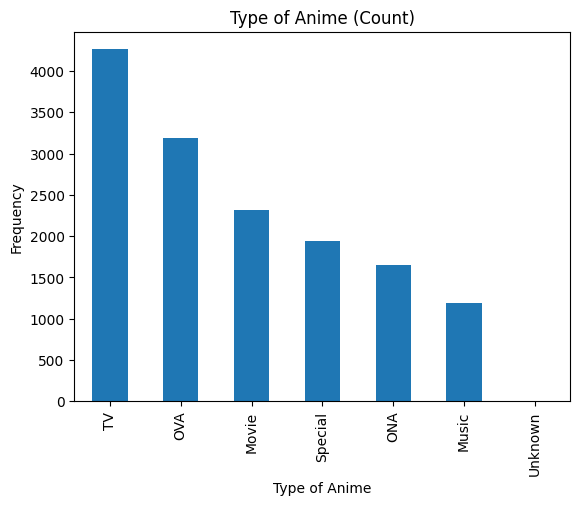

In [15]:
type_counts = anime_clean["Type"].value_counts()
type_counts.plot(kind="bar")
# set the title and axis labels
plt.title("Type of Anime (Count)")
plt.xlabel("Type of Anime")
plt.ylabel("Frequency")

# show the plot
plt.show()

##### Analysis

- From this barplot, we can see that TV anime is the most common form of anime, followed by OVA (Original Video Animation), Movies, Special etc. 
- From calculating the number of unknown variables above, we know there is only 1 Unknown `Type` of anime. 
- This is negligible compared to the total amount of anime. Thus, the unknown anime type will not skew our analysis.
- We remove the "Unknown" Anime `Type` and continue our analysis of `Type` with `score`.

In [16]:
anime_clean = anime_clean[anime_clean['Type'] != 'Unknown']
anime_clean.drop(anime_clean[anime_clean['Type'] == 'Unknown'].index, inplace=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 2.1.1 `Type` vs `Score`
- Over here, we compare mean `Score` of anime according to its `Type`
- We want to observe how the mean 'Score' of an anime differs according to its 'Type'

In [17]:
anime_typescore = pd.DataFrame(anime_clean.groupby('Type')[['Score']].mean().sort_values(by='Score', ascending=False).reset_index())
anime_typescore['Score'] = anime_typescore['Score'].round(3)
anime_typescore

,Type,Score
0,TV,6.847
1,Special,6.417
2,Movie,6.400
3,OVA,6.244
4,ONA,6.096
5,Music,5.886


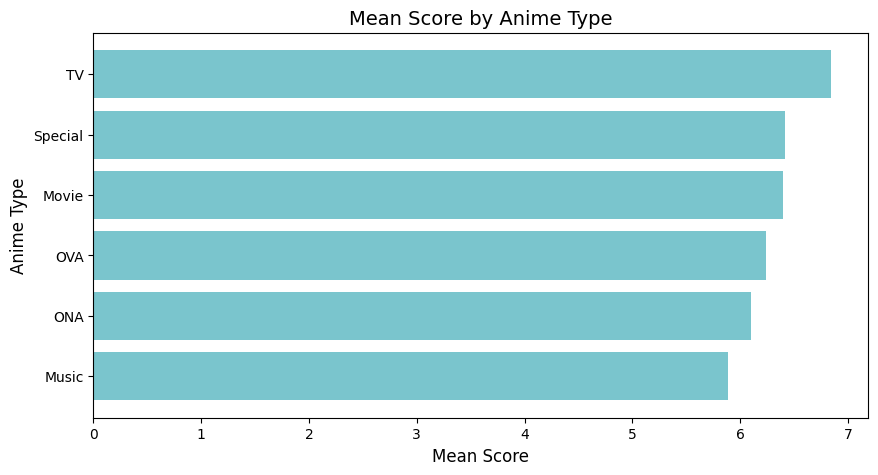

In [18]:
# Create a horizontal bar chart
blue = (100/255, 149/255, 237/255)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(anime_typescore['Type'], anime_typescore['Score'], color='#7AC5CD')

# Add labels and title
ax.set_xlabel('Mean Score', fontsize=12)
ax.set_ylabel('Anime Type', fontsize=12)
ax.set_title('Mean Score by Anime Type', fontsize=14)

# Invert the y-axis to display the data in descending order
ax.invert_yaxis()

plt.show()

##### Type of anime with the highest mean `Score` is TV, followed by Special, Movie, OVA, ONA and Music.
We conclude that TV anime is the most acclaimed compared to other anime types among viewers. 



## 2.2 Analysing the `Source` of Anime
The different types of `Source` include Manga, Web manga, Light novel, Original, Visual novel, Novel,4-koma manga, Game, Music, Mixed media, Other, Card game, Web novel, Book, Picture book, Unknown, Radio.

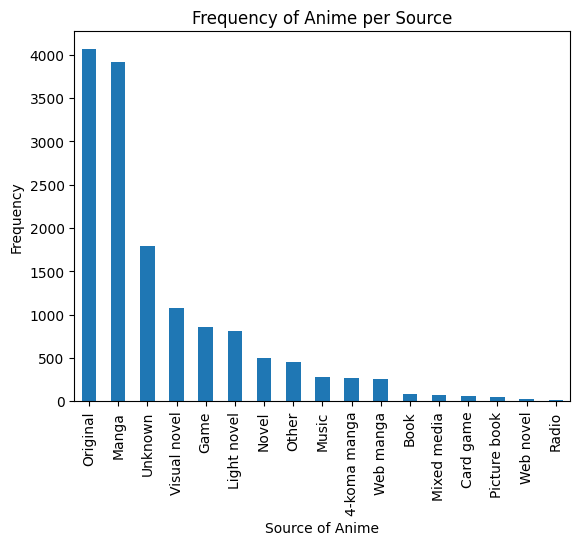

In [19]:
type_counts = anime_clean["Source"].value_counts()

# create a bar plot of the type counts
type_counts.plot(kind="bar")

# set the title and axis labels
plt.title("Frequency of Anime per Source")
plt.xlabel("Source of Anime")
plt.ylabel("Frequency")

# show the plot
plt.show()

#### Analysis
- From this barplot, we can see that Original and Manga are the sources of anime with the highest frequency.

##### Remove `Unknown`
- As `Unknown` variables were not intentionally missing, but rather they were not collected or recorded by our source, the data can be classified as missing completely at random (MSAR)
- It is thus appropriate to remove these `Unknown` values from the analysis, as they are not useful in answering the research question and could potentially bias the results if included.

##### Remove `Other`
- As we do not have information on what comes under the `Other`, including this might make it difficult to draw any meaningful conclusions from the data



In [20]:
anime_sourcescore = anime_clean[anime_clean['Type'] != 'Unknown']
anime_sourcescore.drop(anime_clean[anime_clean['Source'] == 'Unknown'].index, inplace=True)
anime_sourcescore.drop(anime_clean[anime_clean['Source'] == 'Other'].index, inplace=True)

In [21]:
unknown_count = anime_clean[anime_clean["Type"] == "Unknown,Other"].shape[0]
print(unknown_count)

0


#### 2.2.1 `Source` vs `Score`

- Over here, we compare mean `Score` of anime according to its `Source`
- We want to observe how the mean 'Score' of an anime differs according to its 'Source'

In [22]:
# sort Source by acsending Score
anime_sourcescore = pd.DataFrame(anime_clean.groupby('Source')[['Score']].mean().sort_values(by='Score', ascending=False).reset_index())
anime_sourcescore['Score'] = anime_sourcescore['Score'].round(3)
anime_sourcescore

,Source,Score
0,Web novel,7.200
1,Light novel,6.990
2,Manga,6.844
3,Novel,6.769
4,Web manga,6.743
5,4-koma manga,6.684
6,Book,6.569
7,Mixed media,6.423
8,Game,6.340
9,Card game,6.339


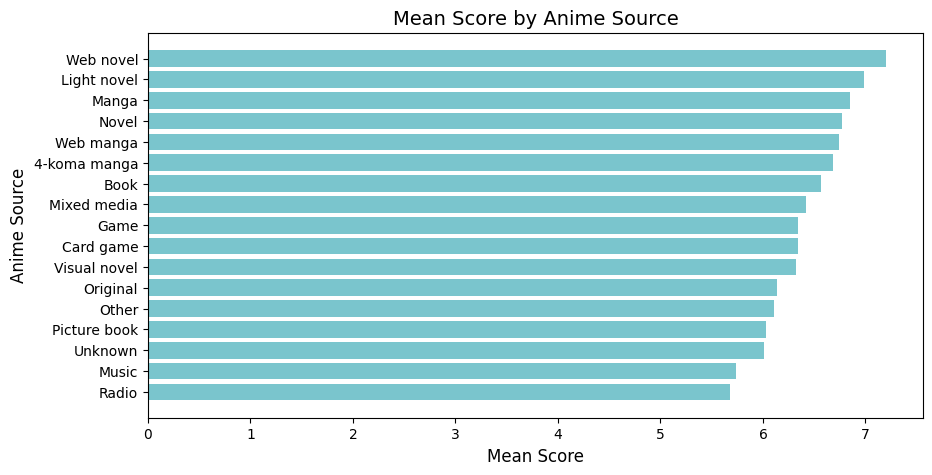

In [23]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(anime_sourcescore['Source'], anime_sourcescore['Score'], color='#7AC5CD')

# Add labels and title
ax.set_xlabel('Mean Score', fontsize=12)
ax.set_ylabel('Anime Source', fontsize=12)
ax.set_title('Mean Score by Anime Source', fontsize=14)

# Invert the y-axis to display the data in descending order
ax.invert_yaxis()

plt.show()


##### Web Novels has the highest mean score (7.2), followed by Light Novels (6.99) , Manga (6.844), Novel (6.769) and Web Manga (6.743) etc.

- `Web Novels` as a source of anime is most acclaimed compared to other anime sources, among viewers. 

## 2.3 Analysing `Themes_Genres`
We want to observe the trend of `Themes_Genres` over `Year` as this indicates how consumers preferences change over time.

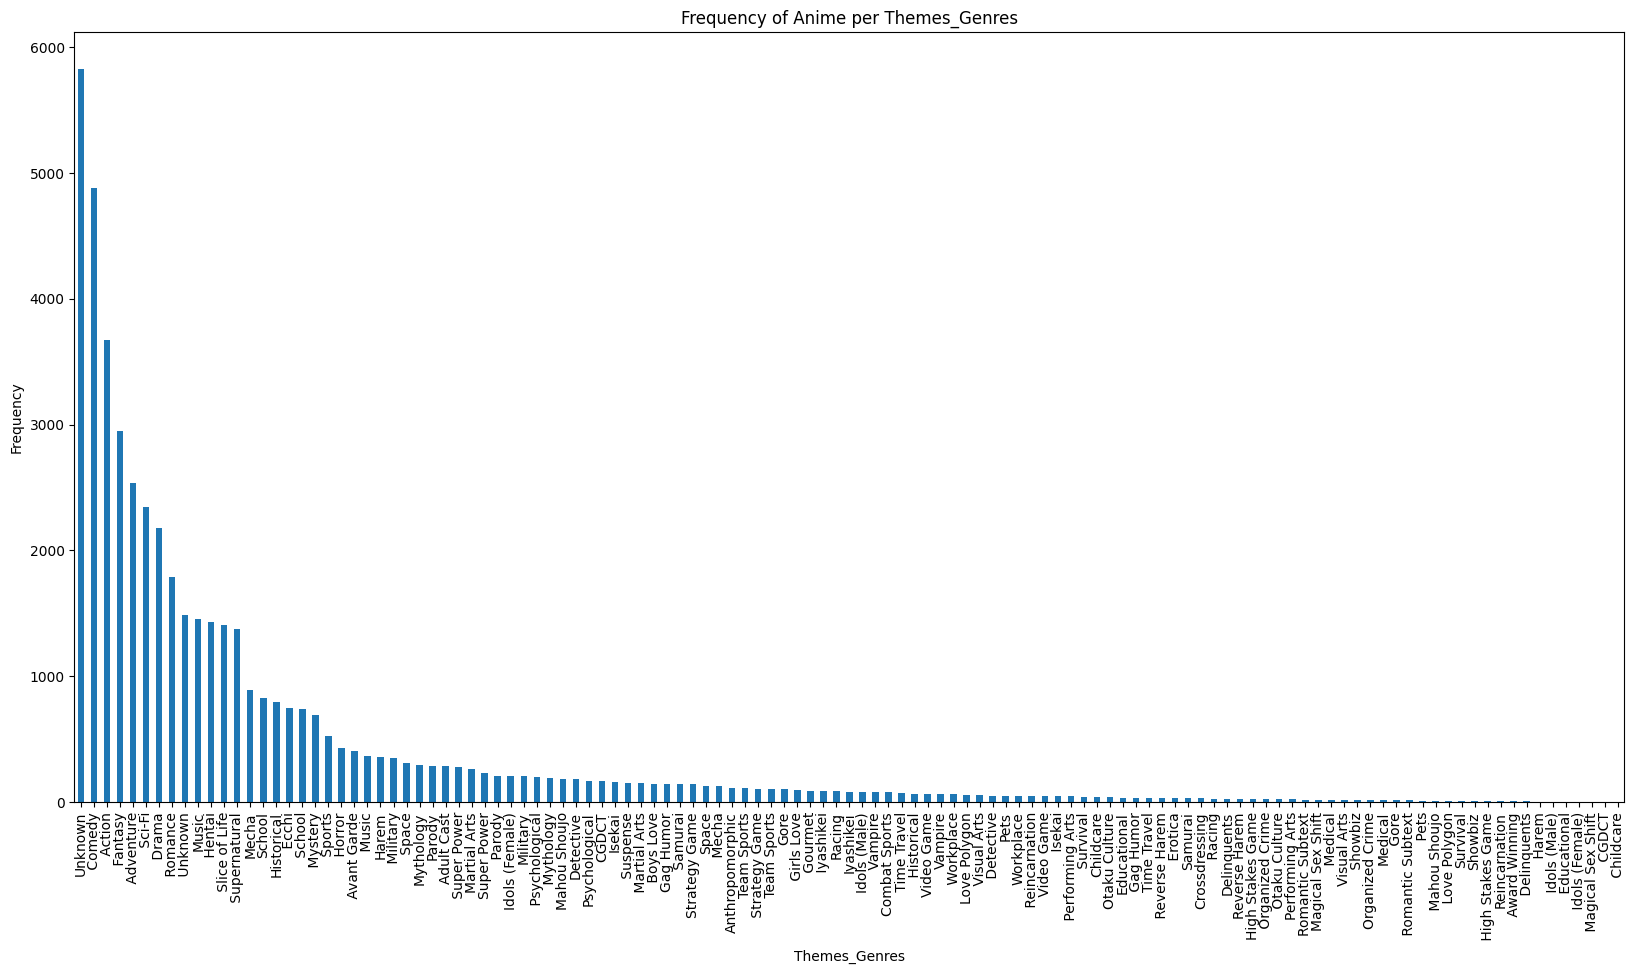

In [24]:
Theme_count = anime_clean['Themes_Genres'].str.split(',', expand=True).stack().value_counts()

# plot the bar chart
fig, ax = plt.subplots(figsize=(20,10))
Theme_count.plot(kind='bar', ax=ax)
ax.set_title('Frequency of Anime per Themes_Genres')
ax.set_xlabel('Themes_Genres')
ax.set_ylabel('Frequency')

# set the fontsize of the x-axis labels to 10
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.show()



##### Remove anime which have Unknown Themes_Genres
- As `Unknown` variables were not intentionally missing, but rather they were not collected or recorded by our source, the data can be classified as missing completely at random (MSAR)
- `Unknown` variables not useful in answering the research question and could potentially bias the results if included.

In [25]:
#If Themes_Genres is "Unknown" or "Unknown, Unknown", we delete the show
anime_clean = anime_clean[anime_clean['Themes_Genres'] != 'Unknown, Unknown']
#if Themes_Genres have Unknown, remove that value while leaving the rest of the data in the cell
anime_clean["Themes_Genres"] = anime_clean["Themes_Genres"].apply(lambda x: ",".join([i for i in x.split(", ") if i != "Unknown"]))
anime_clean.dropna(subset=['Themes_Genres'], inplace=True)
anime_clean

,English,Type,Status,Producers,Licensors,Studios,Source,Demographics,Rating,Score,Scored_Users,Ranked,Popularity,Day,Season,Year,Total duration,FMratio,Themes_Genres
0,Attack on Titan,TV,Finished Airing,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,Shounen,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,Sundays,Spring,2013.0,600.0,0.044180,"Gore,Military,Survival,Action,Drama"
1,Death Note,TV,Finished Airing,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,Shounen,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,Wednesdays,Fall,2006.0,851.0,0.045570,"Psychological,Supernatural,Suspense"
2,Fullmetal Alchemist Brotherhood,TV,Finished Airing,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,Shounen,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,Sundays,Spring,2009.0,1536.0,0.069758,"Military,Action,Adventure,Drama,Fantasy"
3,One Punch Man,TV,Finished Airing,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,Seinen,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,Mondays,Fall,2015.0,288.0,0.020713,"Parody,Super Power,Action,Comedy"
4,Sword Art Online,TV,Finished Airing,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,Unknown,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,Sundays,Summer,2012.0,575.0,0.023101,"Love Polygon,Video Game,Action,Adventure,Fanta..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,O Light,Music,Finished Airing,Unknown,Unknown,Unknown,Original,Unknown,PG-13 - Teens 13 or older,6.231,108.0,78922.0,17746,Unknown,Unknown,2016.0,4.0,0.000000,Music
17737,Mr.,Music,Finished Airing,Unknown,Unknown,Calf Studio,Original,Unknown,PG-13 - Teens 13 or older,6.541,110.0,61512.0,17763,Unknown,Unknown,2022.0,3.0,0.000000,Music
17820,Greenlights Serenade,Music,Finished Airing,Unknown,Unknown,Unknown,Original,Unknown,G - All Ages,5.931,109.0,93762.0,17845,Unknown,Unknown,2018.0,4.0,0.005525,Music
17857,Heart Beat (2019),Music,Finished Airing,"USAGI Production, INoNaKa Music",Unknown,Unknown,Original,Unknown,PG-13 - Teens 13 or older,5.921,103.0,94362.0,17883,Unknown,Unknown,2019.0,4.0,0.000000,"Idols (Female),Music"


In [26]:
unknown_count = anime_clean[anime_clean["Themes_Genres"] == "Unknown,Unknown"].shape[0]
print(unknown_count)

0


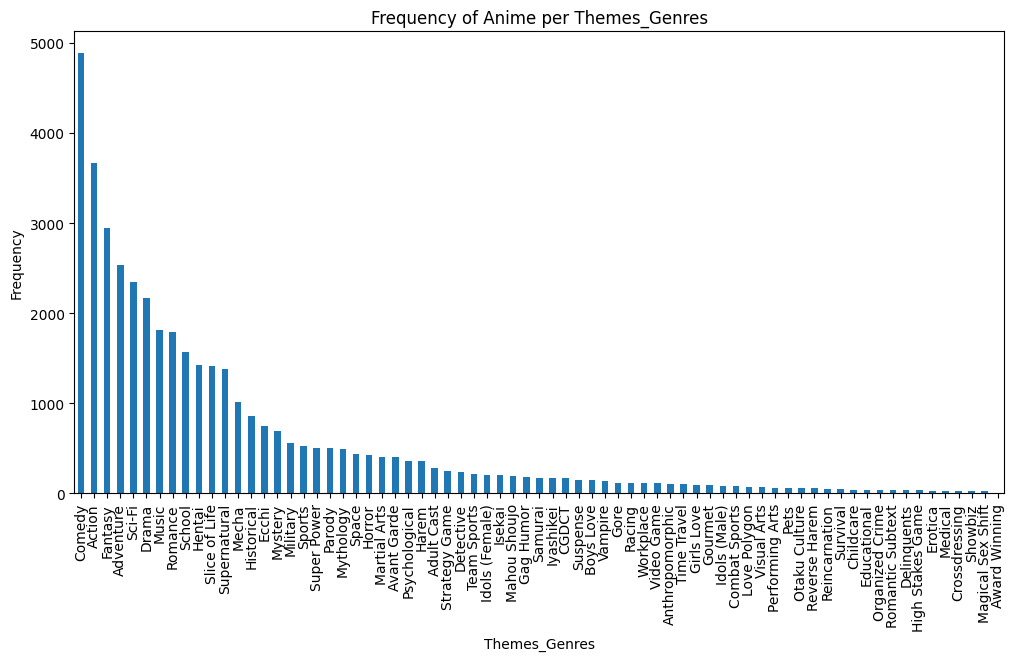

In [27]:
Theme_count = anime_clean['Themes_Genres'].str.split(',', expand=True).stack().value_counts()

# plot the bar chart
fig, ax = plt.subplots(figsize=(12,6))
Theme_count.plot(kind='bar', ax=ax)
ax.set_title('Frequency of Anime per Themes_Genres')
ax.set_xlabel('Themes_Genres')
ax.set_ylabel('Frequency')

plt.show()

- As seen from the barplot, `Comedy`, `Action` and `Fantasy` are the `Themes_Genres` of anime with the highest frequency
- This means that `Comedy`, `Action`, and `Fantasy` are the most common `Themes_Genres` appearing in anime
- However, this does not mean that users prefer these `Themes_Genres` over others. To find out users preferrence for `Themes_Genres`, we will need to compare it to `Score`.

#### 2.3.1 Analysing `Themes_Genres` vs `Score`

In [28]:
# in the new dataframe anime_TGscore, from the column Themes_Genres, we split the data into rows of individual themes and genres for each show where the other variables are unchanged for each show
anime_TGscore = anime_clean
anime_TGscore = anime_TGscore.assign(Themes_Genres=anime_TGscore['Themes_Genres'].str.split(',')).explode('Themes_Genres')

# we compute the average score for each inidividual theme and genre
anime_TGscore = pd.DataFrame(anime_TGscore.groupby('Themes_Genres')[['Score']].mean().sort_values(by='Score', ascending=False).reset_index())
anime_TGscore['Score'] = anime_TGscore['Score'].round(3)
anime_TGscore

,Themes_Genres,Score
0,Romantic Subtext,7.565
1,Iyashikei,7.544
2,Childcare,7.521
3,Love Polygon,7.358
4,Adult Cast,7.318
...,...,...
66,Erotica,6.300
67,Horror,6.180
68,Hentai,6.073
69,Music,6.034


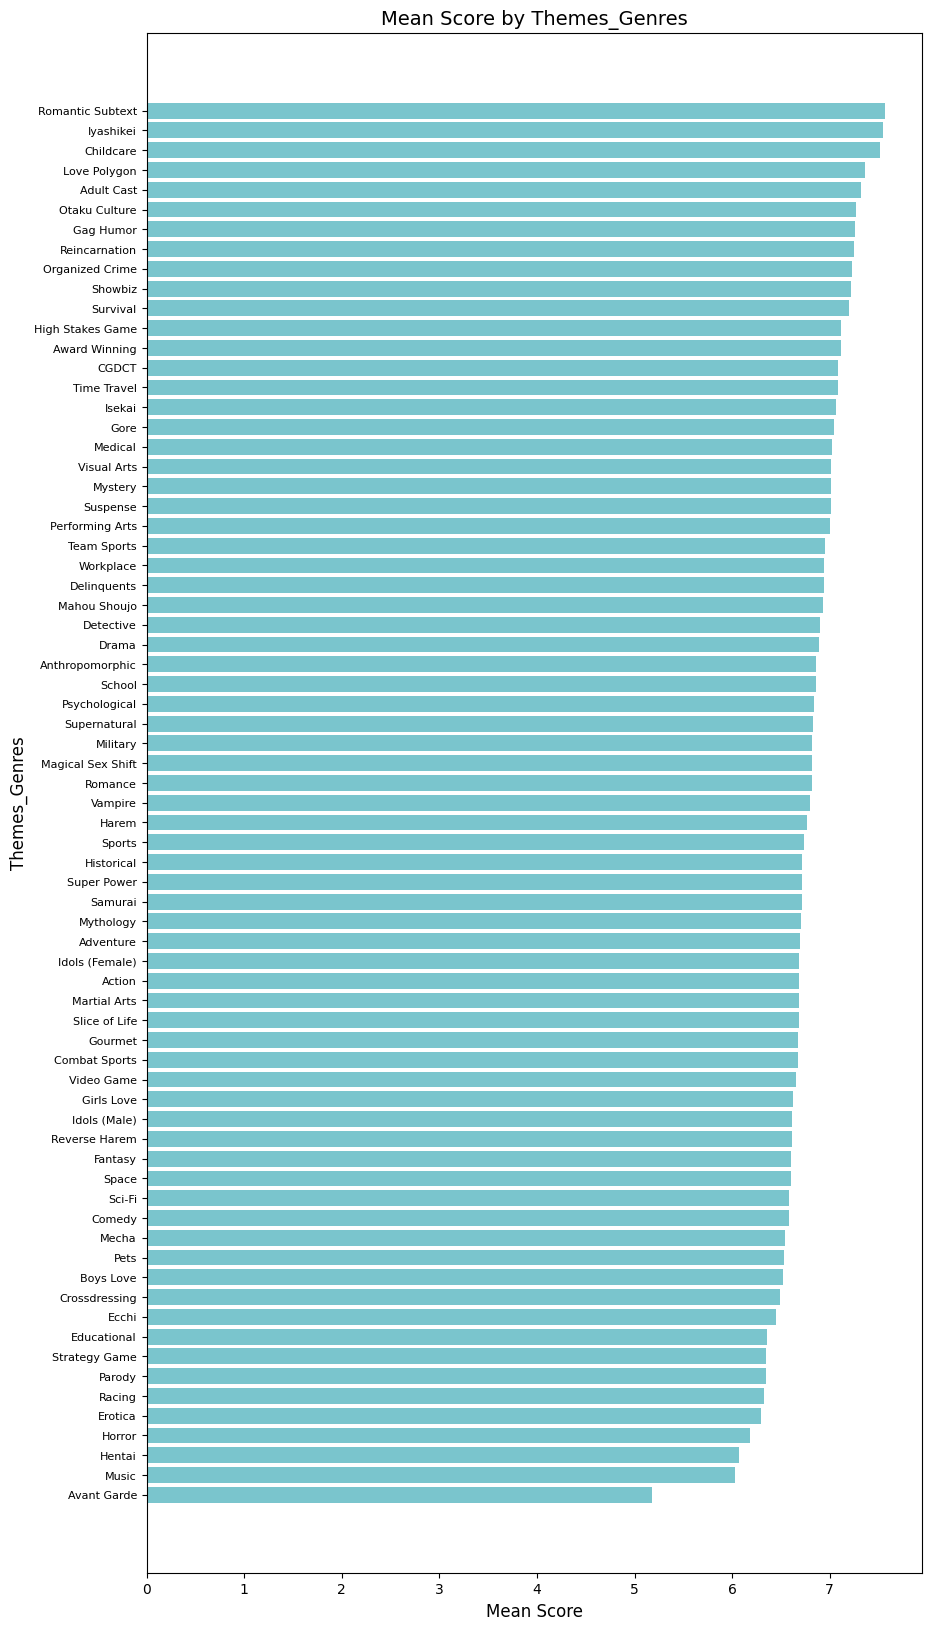

In [29]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(anime_TGscore['Themes_Genres'], anime_TGscore['Score'], color='#7AC5CD')

# Add labels and title
ax.set_xlabel('Mean Score', fontsize=12)
ax.set_ylabel('Themes_Genres', fontsize=12)
ax.set_title('Mean Score by Themes_Genres', fontsize=14)

# Rotate the y-axis tick labels by 45 degrees and set the font size to 8
ax.tick_params(axis='y', labelrotation=0, labelsize=8)

# Invert the y-axis to display the data in descending order
ax.invert_yaxis()

plt.show()

- From this analysis of each Theme and Genre (`Themes_Genres`), we can conclude that some of the most preferred  Themes or Genres include `Romantic Subtext`, followed by `Iyashikei`, `Childcare` etc.

- We note that while Comedy is the most common `Themes_genres`, this does not mean that it is not rated the highest among other Themes_Genres.

Now, let's move on to observing the trend between `Themes_Genres` over time, by comparing `Themes_Genres` with `Year`. 

#### 2.3.2 Analysing the trend in `Themes_Genres` over time 
This is so that we can predict the preferrence of `Themes_Genres` during a specific time period. We do this by comparing the FavMemRatio for each `Themes_Genres` over time.

In [30]:
#find number of Unknowns in Year column
num_unknown = anime_clean[anime_clean['Year'] == 'Unknown']['Year'].count()
print("Number of Unknown values in Year column: ", num_unknown)

Number of Unknown values in Year column:  42


#### 2.3.2 (a) Analysing FavMemRatio
`FavMemRatio` = ratio of `Favorites` : `Members` given in the dataset initially.
We analyse this to find which shows are the most enjoyed by people who watch them.

###### In our next analysis, we need to select the top 20 most preferred `Themes_Genres` so that we can consolidate our analysis.
To determine the `Themes_Genres` to include in our next analysis, we find the correlation between the average `Score` and `FavMemRatio` of each individual `Themes_Genres`.

In [31]:
# in the new dataframe anime_TGFMratio, from the column Themes_Genres, we split the data into rows of individual themes and genres for each show where the other variables are unchanged for each show
anime_TGFMratio = anime_clean
anime_TGFMratio = anime_TGFMratio.assign(Themes_Genres=anime_TGFMratio['Themes_Genres'].str.split(',')).explode('Themes_Genres')

# we compute the average FMratio for each inidividual theme and genre
anime_TGFMratio = pd.DataFrame(anime_TGFMratio.groupby('Themes_Genres')[['FMratio']].mean().sort_values(by='FMratio', ascending=False).reset_index())
anime_TGFMratio['FMratio'] = anime_TGFMratio['FMratio'].round(6)
anime_TGFMratio

,Themes_Genres,FMratio
0,Romantic Subtext,0.009498
1,Love Polygon,0.009081
2,Childcare,0.007390
3,Suspense,0.007382
4,Survival,0.007246
...,...,...
66,Parody,0.002250
67,Music,0.002162
68,Ecchi,0.002060
69,Avant Garde,0.001941


In [32]:
grouped_df = anime_clean.groupby("Themes_Genres").agg({"Score": "mean", "FMratio": "mean"})
correlation = grouped_df["Score"].corr(grouped_df["FMratio"])

# Print the correlation value
print("Correlation between mean score and mean favorite_member_ratio:", correlation)

Correlation between mean score and mean favorite_member_ratio: 0.5784641524542906


From this, we conclude that `Score` and `FavMemRatio` are strongly correlated, so we use FavMemRatio in our analysis.  

## 2.4 Analysing `Studios`
We determine the `Studios` producing and highest rated anime, and analyze how studio preferences change over time.


#### 2.4.1 `Studios` that produce the most anime

In [33]:
Studios_count = anime_clean[anime_clean['Studios'] != 'Unknown']['Studios'].str.split(',', expand=True).stack().value_counts()

Studios_count_df = pd.DataFrame({'Studio': Studios_count.index, 'Number of Anime': Studios_count.values})
Studios_count_df


,Studio,Number of Anime
0,Toei Animation,668
1,Sunrise,503
2,J.C.Staff,372
3,Madhouse,353
4,Production I.G,310
...,...,...
1103,Dawn Animation,1
1104,Sanrio Digital,1
1105,Colored Pencil Animation,1
1106,Indivision,1


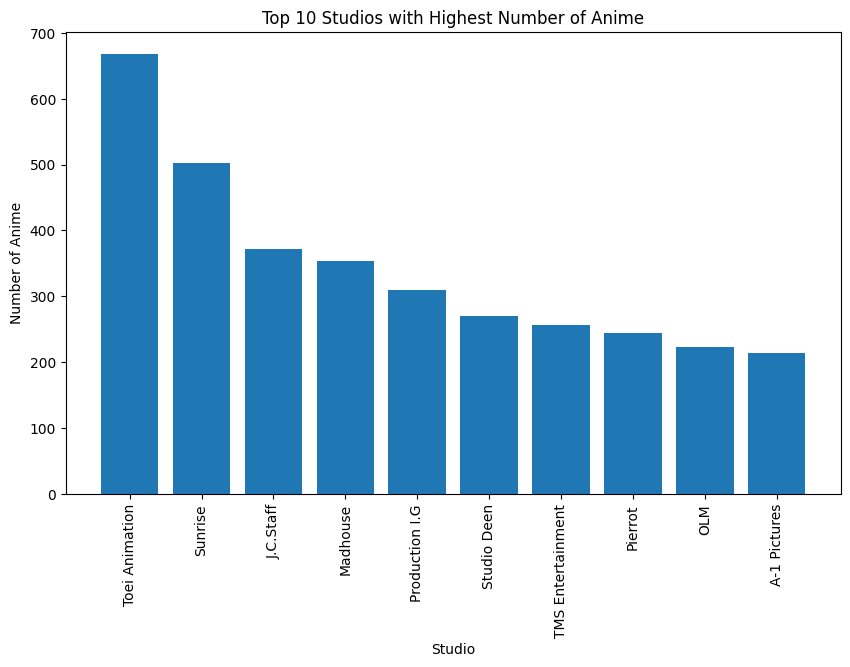

In [34]:
# Sort and filter the Studios_count Series to get the top 10 studios, in desscending order
top_studios = Studios_count.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_studios.index, top_studios.values)
plt.xlabel('Studio')
plt.ylabel('Number of Anime')
plt.title('Top 10 Studios with Highest Number of Anime')
plt.xticks(rotation=90)
plt.show()


 Studios that produce the most anime are `Toei Animation`, `Sunrise` and `J.C. Staff` etc. 

#### 2.4.2 `Studios` that produce the highest scored animes

In [35]:
#Mean score of anime produced by each studio, in descending order
anime_studiosscore = anime_clean.assign(Studios=anime_clean['Studios'].str.split(',')).explode('Studios')
anime_studiosscore = pd.DataFrame(anime_studiosscore.groupby('Studios')[['Score']].mean().sort_values(by='Score', ascending=False).reset_index())
anime_studiosscore['Score'] = anime_studiosscore['Score'].round(3)

anime_studiosscore

,Studios,Score
0,ONIRO,8.531
1,Studio Bind,8.361
2,Egg Firm,8.294
3,Colored Pencil Animation,8.231
4,China Literature Limited,8.231
...,...,...
1104,Kuri Jikken Manga Kobo,3.751
1105,RAMS,3.331
1106,General Entertainment,3.231
1107,Brio Animation,3.151


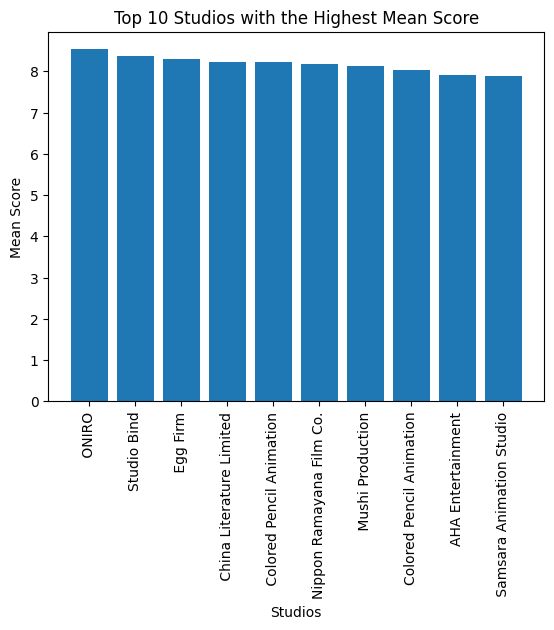

In [36]:
# Sort the dataframe by Score in descending order and select the top 10 rows
top_10_studios = anime_studiosscore.sort_values(by='Score', ascending=False).head(10)

# Create a vertical bar plot
plt.bar(top_10_studios['Studios'], top_10_studios['Score'])

# Set the x-axis label, y-axis label and title
plt.xlabel('Studios')
plt.ylabel('Mean Score')
plt.title('Top 10 Studios with the Highest Mean Score')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


`Studios` with the highest scores are `ONIRO`, `Studio Bind`, `Egg Firm`, `Colored Pencil Animation`, etc.

#### 2.4.3 `Studios` that produce the most anime while having the highest scores
With that, we come up with a composite score to see which `Studios` produce the most anime, while also producing ones with high scores.

In [37]:
# Step 1: Calculate the total number of shows produced by each studio
Studios_count = anime_clean['Studios'].str.split(',', expand=True).stack().value_counts()

# Step 2: Calculate the mean score for each studio
Studios_mean_score = anime_clean.groupby('Studios')['Score'].mean()

# Step 3: Create a new DataFrame combining total number of shows and mean score
studios_df = pd.DataFrame({'Total Shows': Studios_count, 'Mean Score': Studios_mean_score})

# Step 4: Sort the DataFrame by total number of shows and mean score
studios_df = studios_df.sort_values(['Total Shows', 'Mean Score'], ascending=[False, False])

# Step 5: Optionally reset the index
studios_df = studios_df.reset_index()

# Rename the columns for better readability
studios_df = studios_df.rename(columns={'index': 'Studio'})


In [38]:
# Calculate z-score for mean score
mean_value = studios_df['Mean Score'].mean()
std_value = studios_df['Mean Score'].std()
studios_df['Normalized Mean Score'] = (studios_df['Mean Score'] - mean_value) / std_value

# Calculate a composite score by combining the number of shows and normalized mean score
# Assign weights to each criterion based on their importance
weight_num_shows = 0.1
weight_mean_score = 0.9

studios_df['Composite Score'] = (weight_num_shows * studios_df['Total Shows']) + (weight_mean_score * studios_df['Normalized Mean Score'])

# Sort the DataFrame by composite score in descending order to get the rankings
studios_df = studios_df.sort_values('Composite Score', ascending=False)

# Reset the index to start from 1 for the rankings
studios_df = studios_df.reset_index(drop=True)
studios_df.index += 1

# Drop 'Unknown' studio if present
studios_df = studios_df[studios_df['Studio'] != 'Unknown']

# Print the ranked studios
studios_df[['Studio', 'Total Shows', 'Mean Score', 'Normalized Mean Score', 'Composite Score']]

,Studio,Total Shows,Mean Score,Normalized Mean Score,Composite Score
2,Toei Animation,668.0,6.647937,0.405549,67.164994
3,Sunrise,503.0,6.857544,0.679291,50.911362
4,J.C.Staff,372.0,6.781567,0.580066,37.722060
5,Madhouse,353.0,6.928680,0.772194,35.994974
6,Production I.G,310.0,7.071324,0.958483,31.862635
...,...,...,...,...,...
1626,"Public & Basic, Ripple Film",NaN,4.441000,-2.476665,NaN
1627,"Sugar Boy, Blue Cat",NaN,4.307667,-2.650795,NaN
1628,"Studio elle, l-a-unch・BOX",NaN,3.821000,-3.286372,NaN
1629,"ILCA, DRAWIZ, Toho Interactive Animation",NaN,3.741000,-3.390850,NaN


In [39]:
top_10_studios = studios_df.head(5)
top_10_studios

,Studio,Total Shows,Mean Score,Normalized Mean Score,Composite Score
2,Toei Animation,668.0,6.647937,0.405549,67.164994
3,Sunrise,503.0,6.857544,0.679291,50.911362
4,J.C.Staff,372.0,6.781567,0.580066,37.722060
5,Madhouse,353.0,6.928680,0.772194,35.994974
6,Production I.G,310.0,7.071324,0.958483,31.862635


from this, we can see that the top 5 `Studios` according to composite scores are `Toei Animation`, `Sunrise`, `J.C.Staff`, `Madhouse` and `Production I.G`.

#### 2.4.4 Best anime `Studios` over the years
- Observe how viewer's preference for anime `Studios` change over the years. 

In [40]:
best_studios_df = newdf[newdf['Studios'].isin(['Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Production I.G'])]

import plotly.express as px

# Filter data for rows where 'Year' is not 'Unknown'
best_studios_df = best_studios_df[best_studios_df['Year'] != 'Unknown']

# Convert 'Year' column to integer data type
best_studios_df['Year'] = best_studios_df['Year'].astype(int)


# Group by Studio and Year, and calculate mean Score
mean_scores = best_studios_df.groupby(['Studios', 'Year'])['Score'].mean().reset_index()

# Create the line plot
fig = px.line(mean_scores, x='Year', y='Score', color='Studios', 
              labels={"Studios": "Studios", "Score": "Rating"},
              markers=True, line_shape='spline', 
              color_discrete_sequence = palette)
# Update layout and traces
fig.update_layout(
    width=800,
    height=600,
    title="Best Studios and their Ratings over the years",
    xaxis_title="Year",
    yaxis_title="Rating",
    hoverlabel=dict(
        font_size=10
    ),
    font=dict(
        color="purple",
        size=10
    ),
)


fig.update_traces(
    selector=dict(type='scatter'),
    marker=dict(size=8, line=dict(width=2))
)

# Update trace names and hovertemplate
newnames = {'Toei Animation': 'Toei Animation',
            'Sunrise': 'Sunrise',
            'J.C.Staff': 'J.C.Staff',
            'Madhouse': 'Madhouse',
            'Production I.G': 'Production I.G'}

fig.for_each_trace(lambda t: t.update(name=newnames[t.name],
                                      legendgroup=newnames[t.name],
                                      hovertemplate=t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show()


In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define studios to include and their colors
studios = ['Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Production I.G']
colors = {'Toei Animation': 'red', 'Sunrise': 'blue', 'J.C.Staff': 'green', 'Madhouse': 'purple', 'Production I.G': 'orange'}

# Create a subplot for each studio
fig = make_subplots(rows=3, cols=2, shared_xaxes=True, shared_yaxes=True, subplot_titles=studios)

for i, studio in enumerate(studios):
    # Filter data for the studio and drop rows where year is unknown
    studio_data = best_studios_df[best_studios_df['Studios'] == studio]
    studio_data = studio_data[studio_data['Year'] != 'Unknown']
    studio_data['Year'] = studio_data['Year'].astype(int)
    
    # Compute mean score for the studio by year
    mean_scores = studio_data.groupby('Year')['Score'].mean().reset_index()
    
    # Add trace to subplot
    fig.add_trace(
        go.Scatter(x=mean_scores['Year'], y=mean_scores['Score'], name=studio, 
                   line=dict(color=colors[studio]), marker=dict(size=4), mode='lines'),
        row=(i // 2) + 1, col=(i % 2) + 1
    )

# Update layout and axes titles
fig.update_layout(
    width=1000,
    height=800,
    title="Best Studios and their Ratings over the years",
    xaxis_title="Year",
    yaxis_title="Rating",
    hoverlabel=dict(
        font_size=10
    ),
    font=dict(
        color="purple",
        size=10
    ),
    showlegend=False
)

# Show figure
fig.show()



Ratings for `Toei Animation` has been relatively stable while ratings for `Production I.G` and `Madhouse` has been increasing and ratings for `J.C. Staff` has been declining.

## 2.5 Analysing `Demographics`
Demographics include the following:
1. Shounen: Anime targetted towards teen boys, typically below 18
2. Seinen: Anime targetted towards adult men, typically above 18
3. Shoujo: Anime targetted towards teen girls, typically below 18
4. Josei: Anime targetted towards adult women, typically above 18
5. Kids: Anime targetted at young children, typically aged 10 and under

(From: https://www.nypl.org/blog/2018/12/27/beginners-guide-manga)

#### Something about removing unknown values here

In [42]:
# Define the list of demographic categories
categories = ['Shounen', 'Josei', 'Seinen', 'Kids', 'Shoujo', 'Unknown']

# Initialize empty lists for count dataframes
count_df_list = []

# Loop over each category
for category in categories:
    # Filter the data to include only the rows that contain the specified category
    anime_cat = anime_clean[anime_clean['Demographics'].str.contains(r'\b'+category+r'\b', case=False, regex=True)]
    
    # Compute the frequency of the category and append to count dataframe list
    freq_cat = (anime_cat['Demographics'].str.contains(r'\b'+category+r'\b', case=False, regex=True)).sum()
    count_df_list.append({'Demographic Category': category, 'Count': freq_cat})

# Create the count dataframe from the list and sort in descending order
count_df = pd.DataFrame(count_df_list).sort_values(by='Count', ascending=False)

# Print the resulting dataframes
count_df



,Demographic Category,Count
5,Unknown,10128
0,Shounen,1878
3,Kids,945
2,Seinen,802
4,Shoujo,648
1,Josei,94


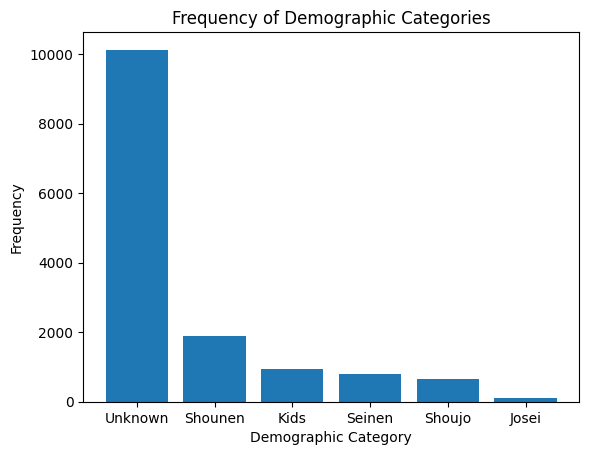

In [43]:
# Create a bar plot of the count dataframe
plt.bar(count_df['Demographic Category'], count_df['Count'])

# Set the title and axis labels
plt.title('Frequency of Demographic Categories')
plt.xlabel('Demographic Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()


we can see that apart from `Unknown`, `Shounen` has the highest frequency, followed by `Kids`, `Seinen` and `Josei`.

#### 2.5.1 Analysing `Demographic` vs `Score`

In [44]:
# Define the list of demographic categories
categories = ['Shounen', 'Josei', 'Seinen', 'Kids', 'Shoujo', 'Unknown']

# Initialize empty lists for mean score dataframes
score_df_list = []

# Loop over each category
for category in categories:
    # Filter the data to include only the rows that contain the specified category
    anime_cat = anime_clean[anime_clean['Demographics'].str.contains(r'\b'+category+r'\b', case=False, regex=True)]

    # Compute the mean score of all shows in the category and append to score dataframe list
    mean_score_cat = anime_cat['Score'].mean()
    score_df_list.append({'Demographic Category': category, 'Mean Score': mean_score_cat})

# Create the count and mean score dataframes from the lists
score_df = pd.DataFrame(score_df_list)

# Print the resulting dataframes
score_df


,Demographic Category,Mean Score
0,Shounen,7.008268
1,Josei,6.958021
2,Seinen,6.935327
3,Kids,6.115127
4,Shoujo,6.794194
5,Unknown,6.285837


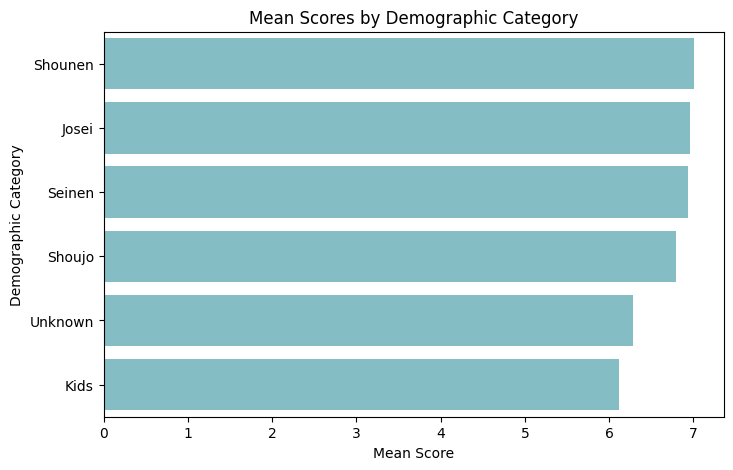

In [45]:
import seaborn as sns
# Sort the score dataframe by mean score in descending order
score_df_sorted = score_df.sort_values(by='Mean Score', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Mean Score', y='Demographic Category', data=score_df_sorted, color='#7AC5CD')

# Add labels and title
plt.xlabel('Mean Score')
plt.ylabel('Demographic Category')
plt.title('Mean Scores by Demographic Category')

# Show the plot
plt.show()


from this, we see that the highest scores for`Demographics` is `Shounen` as well, followed by `Josei`, `Seinen`, `Shoujo`, `Unknown` and lastly `Kids`.

In [46]:
# Split the 'Demographics' column into separate columns for each category
anime_split = anime_clean['Demographics'].str.split(',', expand=True)

# Concatenate the unique categories for each anime into a new column
anime_clean['Demographic Combinations'] = anime_split.apply(lambda x: ','.join(sorted(x.dropna().unique())), axis=1)

# Count the frequency of each unique combination and sort in descending order
combinations_count = anime_clean['Demographic Combinations'].value_counts().sort_values(ascending=False)

combinations_count


Unknown          10128
Shounen           1816
Kids               852
Seinen             801
Shoujo             617
Josei               93
 Shounen,Kids       62
 Shoujo,Kids        30
 Shoujo,Josei        1
 Seinen,Kids         1
Name: Demographic Combinations, dtype: int64

In [47]:
# Split the 'Demographics' column into separate columns for each category
anime_split = anime_clean['Demographics'].str.split(',', expand=True)

# Concatenate the unique categories for each anime into a new column
anime_clean['Demographic Combinations'] = anime_split.apply(lambda x: ','.join(sorted(x.dropna().unique())), axis=1)

# Calculate the mean score for each unique combination of demographics
mean_scores = anime_clean.groupby('Demographic Combinations')['Score'].mean().reset_index()

# Print the resulting dataframe
print(mean_scores)

  Demographic Combinations     Score
0              Seinen,Kids  8.201000
1             Shoujo,Josei  6.331000
2              Shoujo,Kids  6.624333
3             Shounen,Kids  6.789710
4                    Josei  6.964763
5                     Kids  6.045660
6                   Seinen  6.933747
7                   Shoujo  6.803204
8                  Shounen  7.015730
9                  Unknown  6.285837


when considering combination of demographics, the combination of `Seinen, Kids` is most preferred.

## 2.6 Analysing Producers

#### 2.6.1 `Producers` that produce the most anime
- taking productivity into consideration

In [48]:
Producers_count = anime_clean[anime_clean['Producers'] != 'Unknown']['Producers'].str.split(',', expand=True).stack().value_counts()

Producers_count = pd.DataFrame({'Producer': Producers_count.index, 'Number of Anime': Producers_count.values})
Producers_count

,Producer,Number of Anime
0,TV Tokyo,485
1,Aniplex,472
2,Bandai Visual,367
3,Movic,294
4,AT-X,265
...,...,...
1839,Free-Will,1
1840,Wit Studio,1
1841,Maxilla,1
1842,RAB Aomori Broadcasting,1


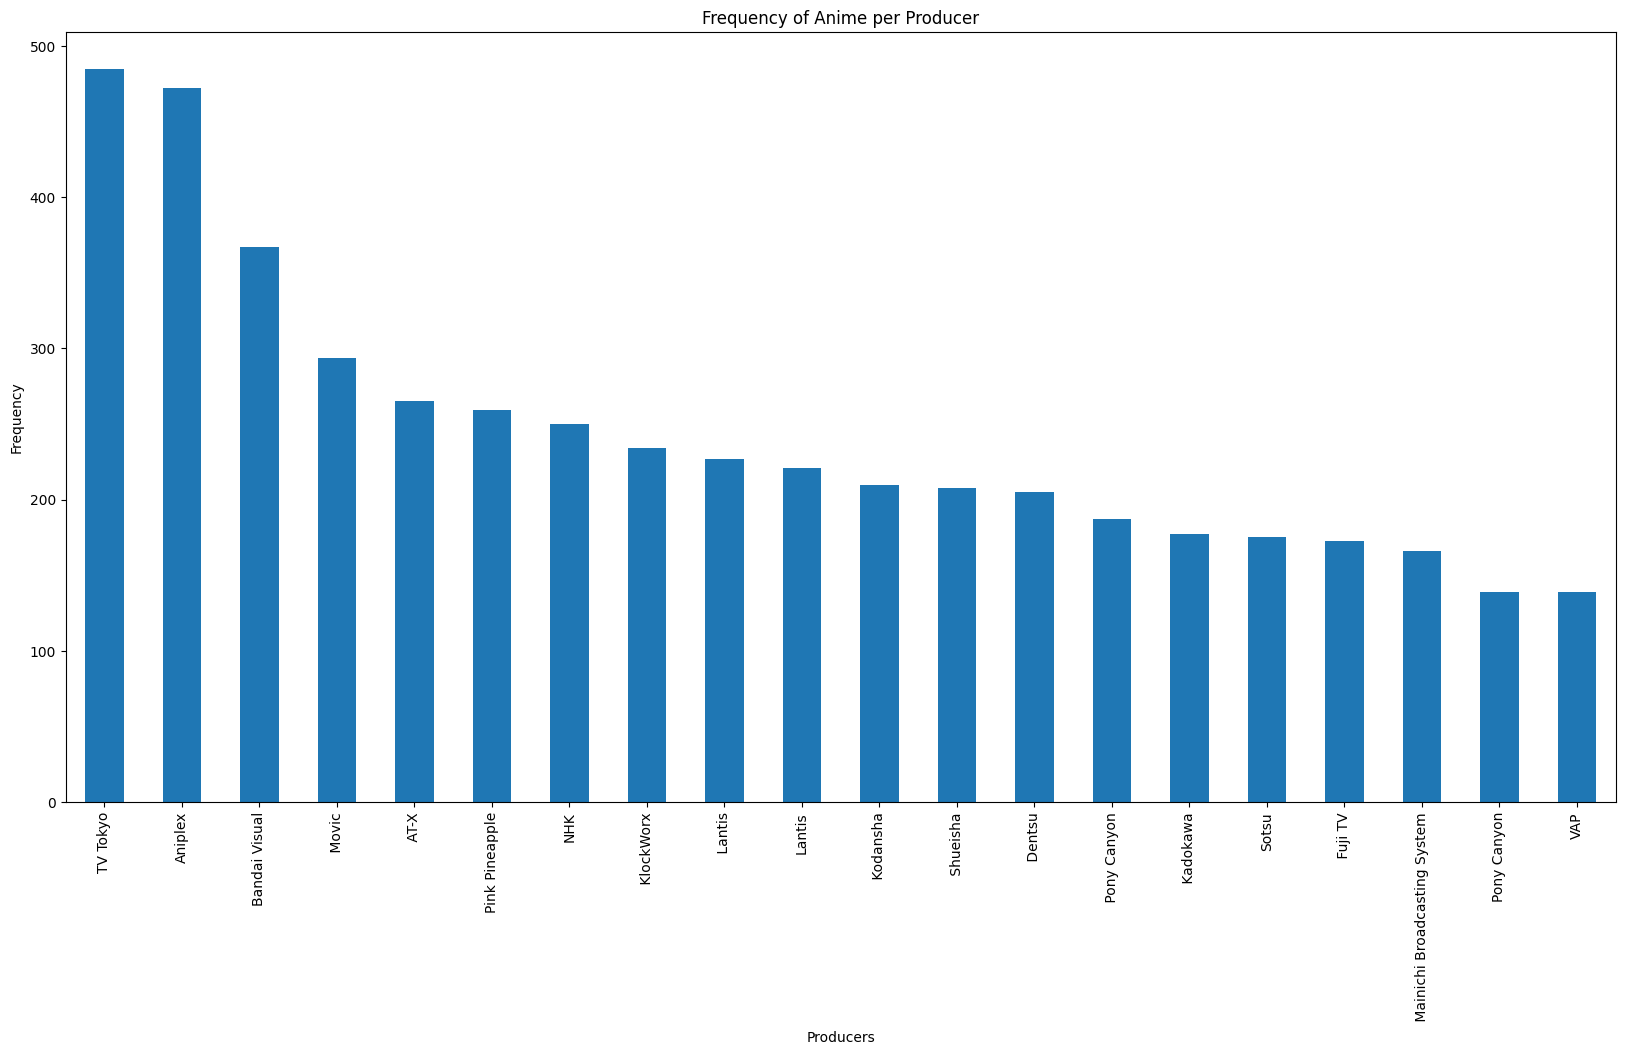

In [49]:
anime_producers=anime_clean
anime_producers = anime_producers[anime_producers['Producers'] != 'Unknown']
Producers_count = anime_producers.assign(Producers=anime_producers['Producers'].str.split(',')).explode('Producers')
# plot the bar chart

top_20_producers = Producers_count['Producers'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(20,10))
top_20_producers.plot(kind='bar', ax=ax)
ax.set_title('Frequency of Anime per Producer')
ax.set_xlabel('Producers')
ax.set_ylabel('Frequency')

# set the fontsize of the x-axis labels to 10
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.show()

from this analysis, we can see that `TV Tokyo` produces the most anime, followed by `Aniplex`, `Bandai Visual`, `Movic`, etc.

#### 2.6.2 `Producers` that produce the highest scored anime
- taking quality of anime into consideration

In [50]:
# in the new dataframe anime_producers, from the column Producers, we split the data into rows of individual Producers for each show where the other variables are unchanged for each show
anime_producers = anime_clean
anime_producers = anime_producers.assign(Producers=anime_producers['Producers'].str.split(',')).explode('Producers')

# we compute the average score for each inidividual producer
anime_producers = pd.DataFrame(anime_producers.groupby('Producers')[['Score']].mean().sort_values(by='Score', ascending=False).reset_index())
anime_producers['Score'] = anime_producers['Score'].round(3)
anime_producers

,Producers,Score
0,Audio Highs,8.951
1,CD Projekt Red,8.731
2,Annapuru,8.711
3,Miracle Robo,8.694
4,Konami,8.626
...,...,...
1840,Quatre Stella,3.151
1841,RME,3.151
1842,UM Productions,3.041
1843,Royal Limousine,2.911


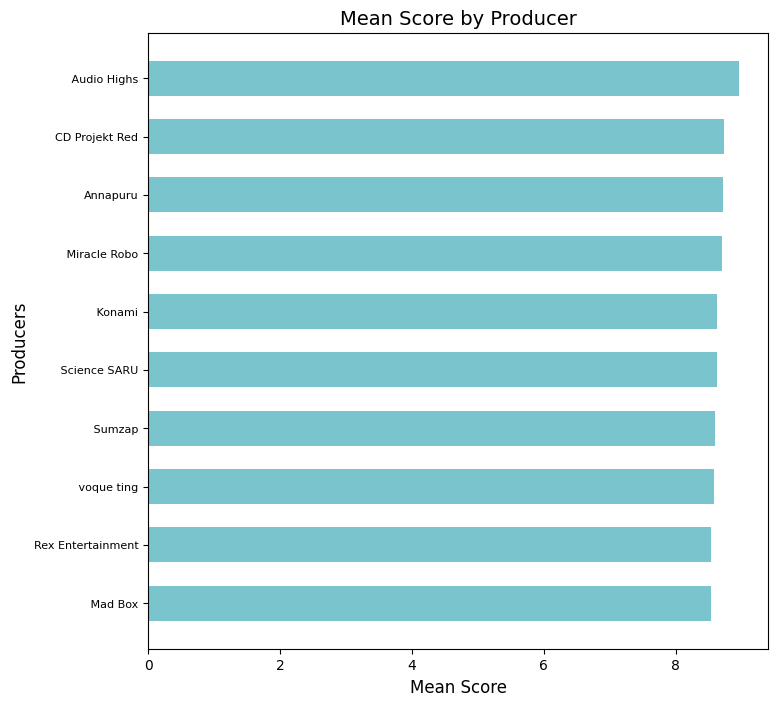

In [51]:
# Create a horizontal bar chart
Producers_count = anime_producers.assign(Producers=anime_producers['Producers'].str.split(',')).explode('Producers')
# plot the bar chart
fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size
Producers_count = Producers_count.head(10)
bar_height = 0.6  # Set the height of the bars
ax.barh(Producers_count['Producers'], Producers_count['Score'], height=bar_height, color='#7AC5CD')

# Add labels and title
ax.set_xlabel('Mean Score', fontsize=12)
ax.set_ylabel('Producers', fontsize=12)
ax.set_title('Mean Score by Producer', fontsize=14)

# Rotate the y-axis tick labels by 0 degrees and set the font size to 8
ax.tick_params(axis='y', labelrotation=0, labelsize=8)

# Invert the y-axis to display the data in descending order
ax.invert_yaxis()

plt.show()


from this, we can see that in terms of the mean score of `Producers`, `Audio Highs` has the highest mean score of anime produced by them, followed by `CD Projekt Red`, `Annapuru`, `Miracle Robo`, etc.

#### 2.6.3 `Producers` that produce the most anime while having the highest scores
With that, we come up with a composite score to see which `Producers` produce the most anime, while also producing ones with high scores.

In [52]:
# Step 1: Remove rows where 'Producers' column contains a comma
anime_clean = anime_clean[~anime_clean['Producers'].str.contains(',')]

# Step 2: Calculate the total number of shows produced by each studio
Producers_count = anime_clean['Producers'].value_counts()

# Step 3: Calculate the mean score for each studio
Producers_mean_score = anime_clean.groupby('Producers')['Score'].mean()

# Step 4: Create a new DataFrame combining total number of shows and mean score
producers_df = pd.DataFrame({'Total Shows': Producers_count, 'Mean Score': Producers_mean_score})

# Step 5: Sort the DataFrame by total number of shows and mean score
producers_df = producers_df.sort_values(['Total Shows', 'Mean Score'], ascending=[False, False])

# Step 6: Optionally reset the index
producers_df = producers_df.reset_index()

# Step 7: Rename the columns for better readability
producers_df = producers_df.rename(columns={'index': 'Producer'})

producers_df


,Producer,Total Shows,Mean Score
0,Unknown,5503,6.174754
1,Pink Pineapple,247,6.279704
2,NHK,199,5.731854
3,Bandai Visual,107,6.654364
4,Aniplex,106,6.902604
...,...,...,...
678,Shanghai Jump Network Technology,1,4.301000
679,Lute,1,4.271000
680,RAMS,1,4.271000
681,Spectrum,1,3.901000


In [53]:
# Calculate z-score for mean score
mean_value = producers_df['Mean Score'].mean()
std_value = producers_df['Mean Score'].std()
producers_df['Normalized Mean Score'] = (producers_df['Mean Score'] - mean_value) / std_value

# Calculate a composite score by combining the number of shows and normalized mean score
# Assign weights to each criterion based on their importance
weight_num_shows = 0.1
weight_mean_score = 0.9

producers_df['Composite Score'] = (weight_num_shows * producers_df['Total Shows']) + (weight_mean_score * producers_df['Normalized Mean Score'])

# Sort the DataFrame by composite score in descending order to get the rankings
producers_df = producers_df.sort_values('Composite Score', ascending=False)

# Reset the index to start from 1 for the rankings
producers_df = producers_df.reset_index(drop=True)
producers_df.index += 1

# Drop 'Unknown' studio if present
producers_df = producers_df[producers_df['Producer'] != 'Unknown']

# Print the ranked studios
producers_df[['Producer', 'Total Shows', 'Mean Score', 'Normalized Mean Score', 'Composite Score']]

,Producer,Total Shows,Mean Score,Normalized Mean Score,Composite Score
2,Pink Pineapple,247,6.279704,0.087084,24.778376
3,NHK,199,5.731854,-0.641503,19.322647
4,Aniplex,106,6.902604,0.915480,11.423932
5,Bandai Visual,107,6.654364,0.585346,11.226811
6,Fuji TV,87,6.555253,0.453537,9.108183
...,...,...,...,...,...
679,Shanghai Jump Network Technology,1,4.301000,-2.544401,-2.189961
680,Lute,1,4.271000,-2.584298,-2.225868
681,RAMS,1,4.271000,-2.584298,-2.225868
682,Spectrum,1,3.901000,-3.076362,-2.668726


#### 2.6.4 Best anime `Producers` over the years
- Observe how viewer's preference for anime `Producers` change over the years. 

In [54]:
# for top 5 producers
best_producers_df = newdf[newdf['Producers'].isin(['Pink Pineapple','NHK','Aniplex','Bandai Visual','Fuji TV'])]

import plotly.express as px

# Filter data for rows where 'Year' is not 'Unknown'
best_producers_df = best_producers_df[best_producers_df['Year'] != 'Unknown']

# Convert 'Year' column to integer data type
best_producers_df['Year'] = best_producers_df['Year'].astype(int)


# Group by Producer and Year, and calculate mean Score
mean_scores = best_producers_df.groupby(['Producers', 'Year'])['Score'].mean().reset_index()

# Create the line plot
fig = px.line(mean_scores, x='Year', y='Score', color='Producers', 
              labels={"Producers": "Producers", "Score": "Rating"},
              markers=True, line_shape='spline',
              color_discrete_sequence = palette) 

# Update layout and traces
fig.update_layout(
    width=800,
    height=600,
    title="Best Producers and their Ratings over the years",
    xaxis_title="Year",
    yaxis_title="Rating",
    hoverlabel=dict(
        font_size=10
    ),
    font=dict(
        color="purple",
        size=10
    ),
)


fig.update_traces(
    selector=dict(type='scatter'),
    marker=dict(size=8, line=dict(width=2))
)

# Update trace names and hovertemplate
newnames = {'Pink Pineapple': 'Pink Pineapple',
            'NHK': 'NHK',
            'Aniplex': 'Aniplex',
            'Bandai Visual': 'Bandai Visual',
            'Fuji TV': 'Fuji TV'}

fig.for_each_trace(lambda t: t.update(name=newnames[t.name],
                                      legendgroup=newnames[t.name],
                                      hovertemplate=t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show()


In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define producer to include and their colors
producers = ['Pink Pineapple','NHK','Aniplex','Bandai Visual','Fuji TV']

# Create a subplot for each producer
fig = make_subplots(rows=3, cols=2, shared_xaxes=True, shared_yaxes=True, subplot_titles=producers)

for i, studio in enumerate(producers):
    # Filter data for the studio and drop rows where year is unknown
    producer_data = best_producers_df[best_producers_df['Producers'] == studio]
    producer_data = producer_data[producer_data['Year'] != 'Unknown']
    producer_data['Year'] = producer_data['Year'].astype(int)
    
    # Compute mean score for the studio by year
    mean_scores = producer_data.groupby('Year')['Score'].mean().reset_index()
    
    # Add trace to subplot
    fig.add_trace(
        go.Scatter(x=mean_scores['Year'], y=mean_scores['Score'], name=studio, 
                   line=dict(color=palette[i]), marker=dict(size=4), mode='lines'),
        row=(i // 2) + 1, col=(i % 2) + 1
    )

# Update layout and axes titles
fig.update_layout(
    width=800,  # Updated figure width
    height=600,  # Updated figure height
    title="Best Producers and their Ratings over the years",
    xaxis_title="Year",
    yaxis_title="Rating",
    hoverlabel=dict(
        font_size=10
    ),
    font=dict(
        color="purple",
        size=10
    ),
    showlegend=False
)

# Show figure
fig.show()


from this analysis, we can see that ratings for `Pink Pineapple` and `NHK` have been having increasing steadily over the years. The ratings for `Aniplex`, `Bandai Visual` and `Fuji TV` have been fluctuating over the years.

## 2.7 Analysing Licensors

#### 2.7.1 `Licensors` that produce the most anime
- taking productivity into consideration

In [56]:
Licensors_count = anime_clean[anime_clean['Licensors'] != 'Unknown']['Licensors'].str.split(',', expand=True).stack().value_counts()

Licensors_count = pd.DataFrame({'Licensor': Licensors_count.index, 'Number of Anime': Licensors_count.values})
Licensors_count

,Licensor,Number of Anime
0,Funimation,384
1,Sentai Filmworks,289
2,Discotek Media,191
3,Media Blasters,156
4,ADV Films,149
...,...,...
102,Haoliners Animation League,1
103,Kadokawa,1
104,Bandai Namco Games,1
105,AN Entertainment,1


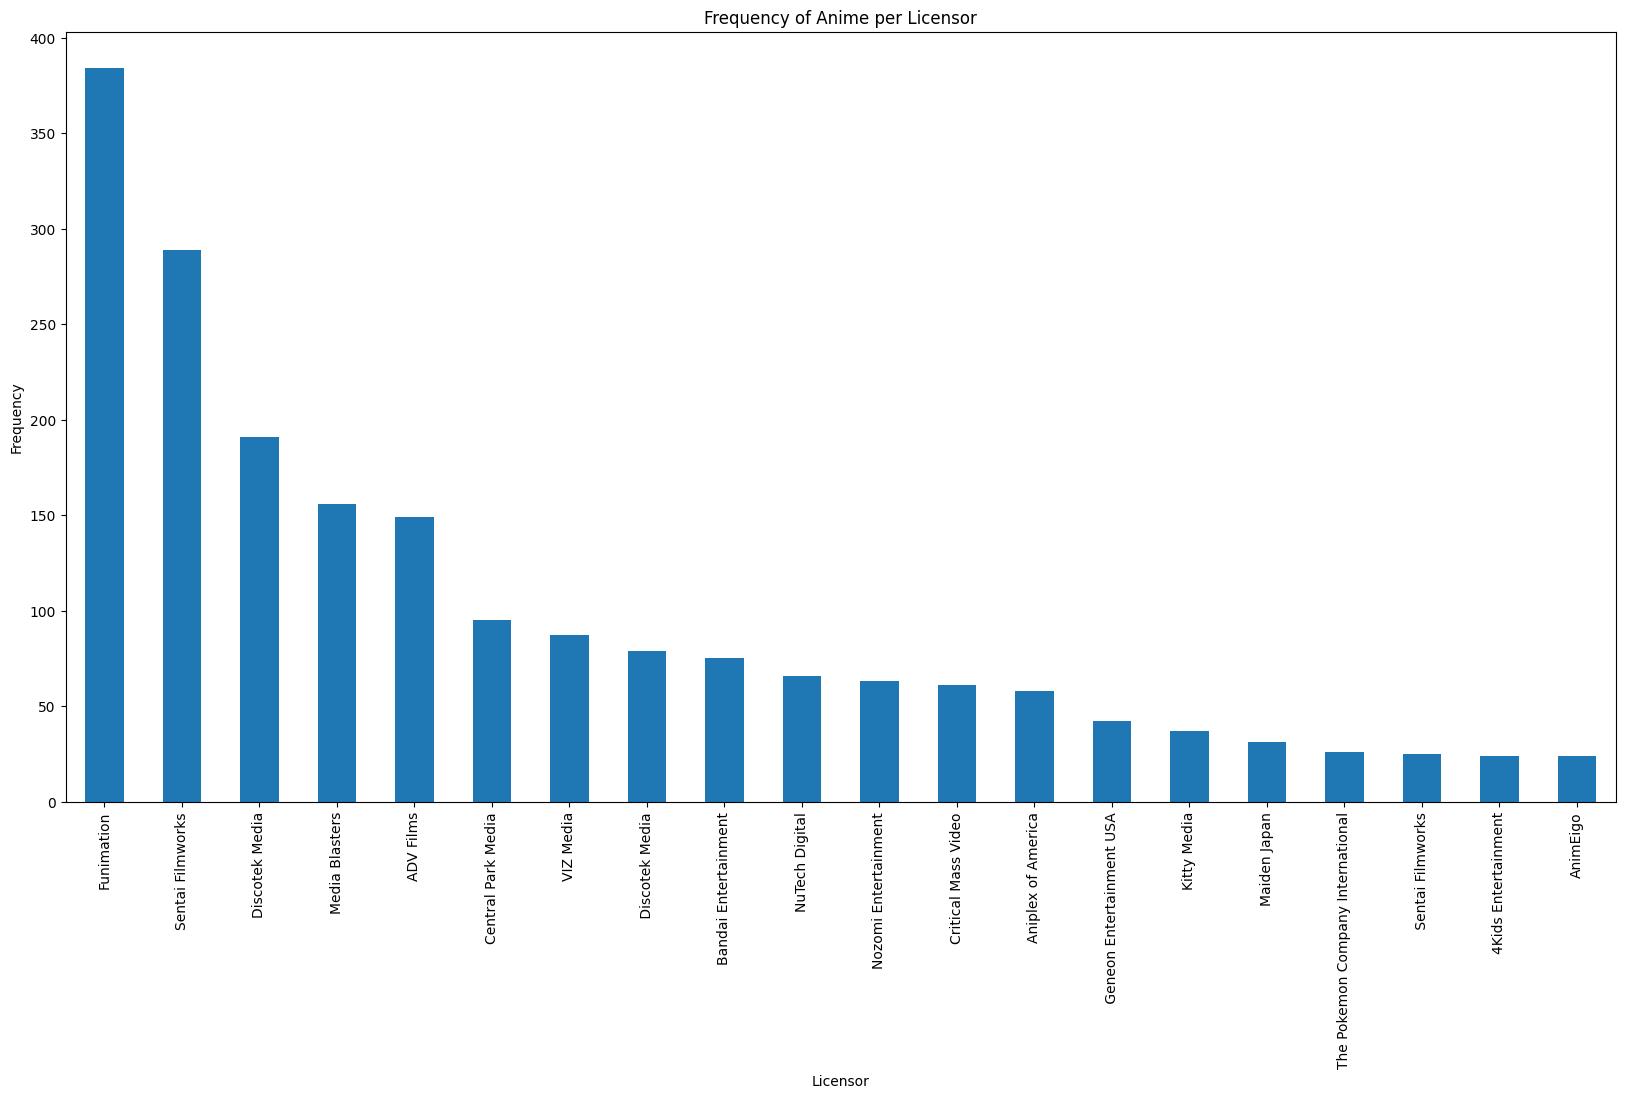

In [57]:
anime_licensors = anime_clean
anime_licensors = anime_licensors[anime_licensors['Licensors'] != 'Unknown']
Licensors_count = anime_licensors.assign(Licensors=anime_licensors['Licensors'].str.split(',')).explode('Licensors')
# plot the bar chart

top_20_licensors = Licensors_count['Licensors'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(20,10))
top_20_licensors.plot(kind='bar', ax=ax)
ax.set_title('Frequency of Anime per Licensor')
ax.set_xlabel('Licensor')
ax.set_ylabel('Frequency')

# set the fontsize of the x-axis labels to 10
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.show()

from this, we can see that `Fumination` has the highest count, followed by `Sentai Filmworks`, `Discotek Media`, `Media Blasters`, `ADV Films` etc.

#### 2.7.2. Licensors that produce the highest scored anime
- taking quality into consderation

In [58]:
anime_licensors = anime_clean
anime_licensors = anime_licensors.assign(Licensors=anime_licensors['Licensors'].str.split(',')).explode('Licensors')
anime_licensors = anime_licensors[~anime_licensors['Licensors'].str.contains(',')]

# Step 2: Calculate the total number of shows produced by each Licensor
Licensors_count = anime_licensors['Licensors'].value_counts()

# Step 3: Calculate the mean score for each studio
Licensors_mean_score = anime_licensors.groupby('Licensors')['Score'].mean()

# Step 4: Create a new DataFrame combining total number of shows and mean score
Licensors_df = pd.DataFrame({'Total Shows': Licensors_count, 'Mean Score': Licensors_mean_score})

# Step 5: Sort the DataFrame by total number of shows and mean score
Licensors_df = Licensors_df.sort_values(['Total Shows', 'Mean Score'], ascending=[False, False])

# Step 6: Optionally reset the index
Licensors_df = Licensors_df.reset_index()

# Step 7: Rename the columns for better readability
Licensors_df = Licensors_df.rename(columns={'index': 'Licensor'})

Licensors_df


,Licensor,Total Shows,Mean Score
0,Unknown,8028,6.116878
1,Funimation,384,6.970557
2,Sentai Filmworks,289,6.864391
3,Discotek Media,191,6.856707
4,Media Blasters,156,6.045295
...,...,...,...
103,Hasbro,1,5.831000
104,Kadokawa,1,5.741000
105,Synch-Point,1,5.741000
106,Ascendent Animation,1,5.711000


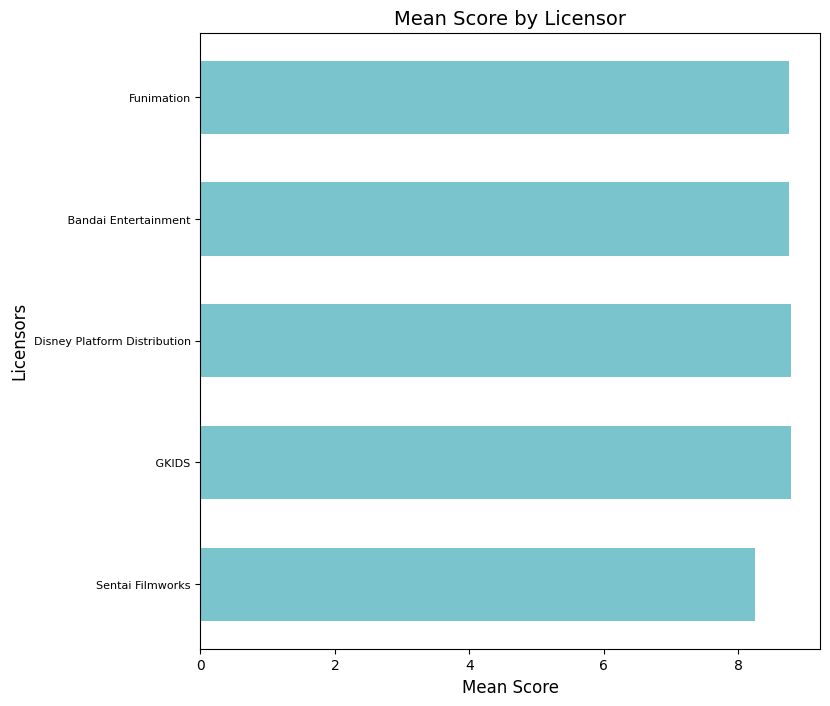

In [59]:
# Create a horizontal bar chart
Licensors_count = anime_licensors.assign(Producers=anime_licensors['Licensors'].str.split(',')).explode('Licensors')
# plot the bar chart
fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size
Licensors_count = Licensors_count.head(6)
bar_height = 0.6  # Set the height of the bars
ax.barh(Licensors_count['Licensors'], Licensors_count['Score'], height=bar_height, color='#7AC5CD')

# Add labels and title
ax.set_xlabel('Mean Score', fontsize=12)
ax.set_ylabel('Licensors', fontsize=12)
ax.set_title('Mean Score by Licensor', fontsize=14)

# Rotate the y-axis tick labels by 0 degrees and set the font size to 8
ax.tick_params(axis='y', labelrotation=0, labelsize=8)

# Invert the y-axis to display the data in descending order
ax.invert_yaxis()

plt.show()


from this we can see that according to mean score by licensor, `Funimation` scored the highest, followed by `Bandai Entertainment`, `Disney Platform Distribution`, `GKIDS` and `Sentai Flimworks` etc.

#### 2.7.3 `Licensors` that produce the most anime while having the highest scores
With that, we come up with a composite score to see which `Licensors` produce the most anime, while also producing ones with high scores.

In [60]:
# Drop 'Unknown' studio if present
Licensors_df = Licensors_df[Licensors_df['Licensor'] != 'Unknown']

# Calculate z-score for mean score
mean_value = Licensors_df['Mean Score'].mean()
std_value = Licensors_df['Mean Score'].std()
Licensors_df['Normalized Mean Score'] = (Licensors_df['Mean Score'] - mean_value) / std_value

# Calculate a composite score by combining the number of shows and normalized mean score
# Assign weights to each criterion based on their importance
weight_num_shows = 0.1
weight_mean_score = 0.9

Licensors_df['Composite Score'] = (weight_num_shows * Licensors_df['Total Shows']) + (weight_mean_score * Licensors_df['Normalized Mean Score'])

# Sort the DataFrame by composite score in descending order to get the rankings
Licensors_df = Licensors_df.sort_values('Composite Score', ascending=False)

# Reset the index to start from 1 for the rankings
Licensors_df = Licensors_df.reset_index(drop=True)
Licensors_df.index += 1

# Print the ranked studios
Licensors_df[['Licensor', 'Total Shows', 'Mean Score', 'Normalized Mean Score', 'Composite Score']]


/tmp/ipykernel_609/2939450314.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_609/2939450314.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Licensor,Total Shows,Mean Score,Normalized Mean Score,Composite Score
1,Funimation,384,6.970557,0.460411,38.814370
2,Sentai Filmworks,289,6.864391,0.286213,29.157591
3,Discotek Media,191,6.856707,0.273604,19.346244
4,ADV Films,149,6.536503,-0.251788,14.673391
5,Media Blasters,156,6.045295,-1.057768,14.648009
...,...,...,...,...,...
103,Pioneer LDC,2,5.696000,-1.630894,-1.267804
104,Kadokawa,1,5.741000,-1.557057,-1.301352
105,Synch-Point,1,5.741000,-1.557057,-1.301352
106,Ascendent Animation,1,5.711000,-1.606282,-1.345653


In [61]:
# for top 5 producers
best_licensors_df = newdf[newdf['Licensors'].isin(['Funimation','Sentai Filmworks','Discotek Media','ADV Films','Media Blasters'])]

import plotly.express as px

# Filter data for rows where 'Year' is not 'Unknown'
best_licensors_df = best_licensors_df[best_licensors_df['Year'] != 'Unknown']

# Convert 'Year' column to integer data type
best_licensors_df['Year'] = best_licensors_df['Year'].astype(int)

# Group by Producer and Year, and calculate mean Score
mean_scores = best_licensors_df.groupby(['Licensors', 'Year'])['Score'].mean().reset_index()

# Create the line plot
fig = px.line(mean_scores, x='Year', y='Score', color='Licensors', 
              labels={"Licensors": "Licensors", "Score": "Rating"},
              markers=True, line_shape='spline',
              color_discrete_sequence = palette) 

# Update layout and traces
fig.update_layout(
    width=800,
    height=600,
    title="Best Producers and their Ratings over the years",
    xaxis_title="Year",
    yaxis_title="Rating",
    hoverlabel=dict(
        font_size=10
    ),
    font=dict(
        color="purple",
        size=10
    ),
)


fig.update_traces(
    selector=dict(type='scatter'),
    marker=dict(size=8, line=dict(width=2))
)

# Update trace names and hovertemplate
newnames = {'Funimation': 'Funimation',
            'Sentai Filmworks': 'Sentai Filmworks',
            'Discotek Media': 'Discotek Media',
            'ADV Films': 'ADV Films',
            'Media Blasters': 'Media Blasters'}

fig.for_each_trace(lambda t: t.update(name=newnames[t.name],
                                      legendgroup=newnames[t.name],
                                      hovertemplate=t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show()


from this we can see that all of the top 5 Licensos have experienced an general increase in their ratings over the years.

#### 2.7.4 Best anime `Licensors` over the years
- Observe how viewer's preference for anime `Licensors` change over the years. 
- We do this for the top 5 `Licensors` as found from the composite scores. These are `Fumination`, `Sentai Filmworks`, `Discotek Media`,`ADV Films` and `Media Blasters`.

In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define licensors
licensors = ['Funimation','Sentai Filmworks','Discotek Media','ADV Films','Media Blasters']

# Create a subplot for each licensor
fig = make_subplots(rows=3, cols=2, shared_xaxes=True, shared_yaxes=True, subplot_titles=licensors)

for i, licensor in enumerate(licensors):
    # Filter data for the licensor and drop rows where year is unknown
    licensor_data = best_licensors_df[best_licensors_df['Licensors'] == licensor] 
    licensor_data = licensor_data[licensor_data['Year'] != 'Unknown']
    licensor_data['Year'] = licensor_data['Year'].astype(int)
    
    # Compute mean score for the licensor by year
    mean_scores = licensor_data.groupby('Year')['Score'].mean().reset_index()
    
    # Add trace to subplot
    fig.add_trace(
        go.Scatter(x=mean_scores['Year'], y=mean_scores['Score'], name=licensor, 
                   line=dict(color=palette[i]), marker=dict(size=4), mode='lines'),
        row=(i // 2) + 1, col=(i % 2) + 1
    )

fig.update_layout(
    width=800,  
    height=600,  
    title="Best Licensors and their Ratings over the years",
    xaxis_title="Year",
    yaxis_title="Rating",
    hoverlabel=dict(
        font_size=10
    ),
    font=dict(
        color="purple",
        size=10
    ),
    showlegend=False
)

# Show figure
fig.show()

from this we can see that ratings for `Sentain Filmworks` and `ADV Flims` has been relatively stable, that for `Discotek Media` and `Media Blasters` has been increasing while ratings for `Fumnation`, although higher than the other Licensors, has been experiencing a decline in their ratings.

## 2.8 Analysing Ratings

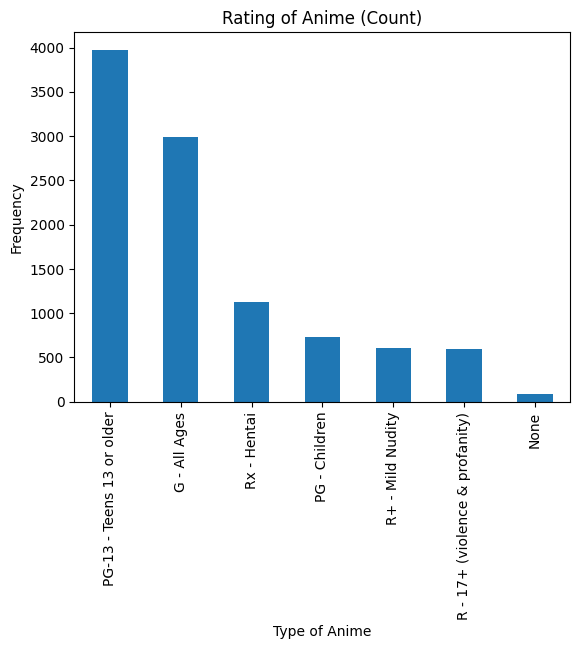

In [63]:
rating_counts = anime_clean["Rating"].value_counts()
rating_counts.plot(kind="bar")
# set the title and axis labels
plt.title("Rating of Anime (Count)")
plt.xlabel("Type of Anime")
plt.ylabel("Frequency")

# show the plot
plt.show()

from this we can see that `PG-13` was the most common anime rating, followed by `G`, `Rx`, `PG`, `R+`, `R-17+` and `none`

In [64]:
anime_clean = anime_clean[anime_clean['Rating'] != 'Unknown']
anime_clean.drop(anime_clean[anime_clean['Rating'] == 'Unknown'].index, inplace=True)


In [65]:
anime_typescore = pd.DataFrame(anime_clean.groupby('Rating')[['Score']].mean().sort_values(by='Score', ascending=False).reset_index())
anime_typescore['Score'] = anime_typescore['Score'].round(3)
anime_typescore

,Rating,Score
0,R - 17+ (violence & profanity),6.600
1,PG-13 - Teens 13 or older,6.518
2,PG - Children,6.270
3,None,6.079
4,Rx - Hentai,6.055
5,R+ - Mild Nudity,6.029
6,G - All Ages,5.856


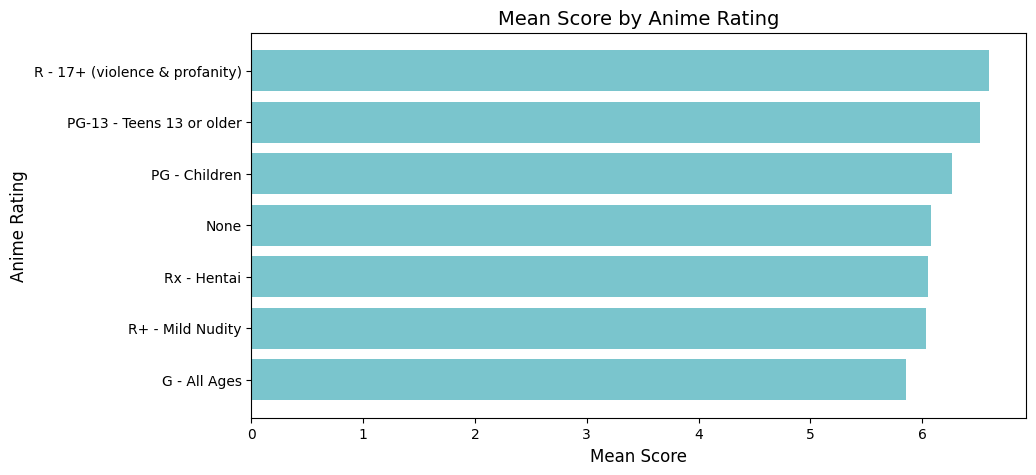

In [66]:
# Create a horizontal bar chart
blue = (100/255, 149/255, 237/255)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(anime_typescore['Rating'], anime_typescore['Score'], color='#7AC5CD')

# Add labels and title
ax.set_xlabel('Mean Score', fontsize=12)
ax.set_ylabel('Anime Rating', fontsize=12)
ax.set_title('Mean Score by Anime Rating', fontsize=14)

# Invert the y-axis to display the data in descending order
ax.invert_yaxis()

plt.show()

from this analysis we can see that according to the mean score, `R-17+` scored the highest followed by `PG-13`, `PG`, `none`, `Rx`, `R+` and `G`.

## Summary of Exploratory Data Analysis and Visualisation

#### 1. `Type`
##### Most common anime types
- TV is the most common, followed by OVA, Movie, Special, ONA and Music. 

##### Most acclaimed anime type
- TV is also the most acclaimed type of anime, followed by Special, Movie, OVA, ONA, and Music

#### 2. `Source`
##### Most common anime sources
- Orginal, Manga 

#### 3. `Themes_Genres`
#### 4. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11a139b8-46d6-4d29-a3ad-d2d21cc99056' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>